In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import src.util as util
import yaml
import copy
from tqdm import tqdm
import os
from sklearn.cluster import KMeans
import shap


/Users/Geethika/Documents/GitHub/Medicare Claims/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config_data=util.config_load()

In [3]:
data_combined_Fe=util.pickle_load(config_data["raw_dataset_path_data_combined"])


In [6]:
data_combined_Fe.columns


Index(['Provider', 'Clm_cnt_Provider_BeneID',
       'Clm_cnt_Provider_AttendingPhysician',
       'Clm_cnt_Provider_OtherPhysician',
       'Clm_cnt_Provider_OperatingPhysician',
       'Clm_cnt_Provider_ClmAdmitDiagnosisCode',
       'Clm_cnt_Provider_ClmProcedureCode_1',
       'Clm_cnt_Provider_ClmProcedureCode_2',
       'Clm_cnt_Provider_ClmProcedureCode_3',
       'Clm_cnt_Provider_ClmDiagnosisCode_1',
       ...
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'DOD_Flag'],
      dtype='object', length=116)

In [20]:
df_set1_level_1=data_combined_Fe.copy()


In [16]:
df_set1_level_1.drop(columns='Provider').corr().to_csv('datacheck.csv')

In [8]:
# columns=['Provider',
# 'Clm_cnt_Provider_OperatingPhysician',
# 'Clm_cnt_Provider_BeneID_AttendingPhysician_ClmProcedureCode_3',
# 'Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_1',
# 'Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_2',
# 'Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_3',
# 'Clm_cnt_Provider_BeneID_OperatingPhysician_ClmProcedureCode_3',
# 'PRV_TotalInscClaimAmtReimbursed']
columns=['Clm_cnt_Provider_OperatingPhysician',
'PRV_TotalInscClaimAmtReimbursed',
'Prv_unq_cnt_DiagnosisGroupCode', 
'Prv_unq_cnt_ClmAdmitDiagnosisCode',
'Clm_cnt_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_9']

In [9]:
columns=['Provider','Clm_cnt_Provider_BeneID',
'Clm_cnt_Provider_OperatingPhysician',
'PRV_TotalInscClaimAmtReimbursed',
'Prv_unq_cnt_DiagnosisGroupCode', 
'Clm_cnt_Provider_ClmDiagnosisCode_9',
]

Correlation check - Round 1

In [ ]:
df_set1_level_1.drop(columns=['Provider']).corr()

Correlation check - Round 2

In [ ]:
columns=['Provider','Clm_cnt_Provider_BeneID',
'Clm_cnt_Provider_AttendingPhysician',
'Clm_cnt_Provider_OtherPhysician',
'Clm_cnt_Provider_OperatingPhysician',
'Clm_cnt_Provider_ClmAdmitDiagnosisCode',
'Clm_cnt_Provider_ClmDiagnosisCode_9',
'Clm_cnt_Provider_ClmDiagnosisCode_10',
'Clm_cnt_Provider_DiagnosisGroupCode',
'Clm_cnt_Provider_BeneID_AttendingPhysician_ClmAdmitDiagnosisCode',
'Clm_cnt_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1',
'Clm_cnt_Provider_BeneID_AttendingPhysician_ClmProcedureCode_2',
'Clm_cnt_Provider_BeneID_AttendingPhysician_ClmProcedureCode_3',
'Clm_cnt_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1',
'Clm_cnt_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_9',
'Clm_cnt_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_10',
'Clm_cnt_Provider_BeneID_AttendingPhysician_DiagnosisGroupCode',
'Clm_cnt_Provider_BeneID_OtherPhysician_ClmAdmitDiagnosisCode',
'Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_1',
'Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_2',
'Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_3',
'Clm_cnt_Provider_BeneID_OperatingPhysician_ClmProcedureCode_1',
'Clm_cnt_Provider_BeneID_OperatingPhysician_ClmProcedureCode_2',
'Clm_cnt_Provider_BeneID_OperatingPhysician_ClmProcedureCode_3',
'Clm_cnt_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_9',
'Clm_cnt_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_10',
'Clm_cnt_Provider_BeneID_OperatingPhysician_DiagnosisGroupCode',
'Clm_cnt_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3',
'PRV_TotalDeductibleAmtPaid',
'PRV_TotalInscClaimAmtReimbursed',
'PRV_TotalAdmit_Period',
'Prv_unq_cnt_DiagnosisGroupCode',
'Is_admit']

In [ ]:
df_set1_level_1=df_set1_level_1[columns]

In [24]:
df_set1_level_1.drop(columns=['Provider']).corr().to_csv('datacheck1.csv')

Correlation Check- Round 3

In [35]:
columns=['Provider','Clm_cnt_Provider_BeneID',
'Clm_cnt_Provider_OperatingPhysician',
'Clm_cnt_Provider_ClmDiagnosisCode_9',
'Clm_cnt_Provider_ClmDiagnosisCode_10',
'Clm_cnt_Provider_DiagnosisGroupCode',
'Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_1',
'Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_3',
'Clm_cnt_Provider_BeneID_OperatingPhysician_ClmProcedureCode_3',
'Clm_cnt_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3',
'PRV_TotalInscClaimAmtReimbursed']

In [36]:
df_set1_level_1=df_set1_level_1[columns]

In [37]:
df_set1_level_1.drop(columns=['Provider']).corr()

Clm_cnt_Provider_BeneID  \
Clm_cnt_Provider_BeneID                                            1.000000   
Clm_cnt_Provider_OperatingPhysician                                0.980802   
Clm_cnt_Provider_ClmDiagnosisCode_9                                0.642160   
Clm_cnt_Provider_ClmDiagnosisCode_10                               0.486051   
Clm_cnt_Provider_DiagnosisGroupCode                                0.291212   
Clm_cnt_Provider_BeneID_OtherPhysician_ClmProce...                 0.237096   
Clm_cnt_Provider_BeneID_OtherPhysician_ClmProce...                 0.112274   
Clm_cnt_Provider_BeneID_OperatingPhysician_ClmP...                 0.258133   
Clm_cnt_Provider_BeneID_ClmDiagnosisCode_10_Clm...                 0.160743   
PRV_TotalInscClaimAmtReimbursed                                    0.542463   

                                                    Clm_cnt_Provider_OperatingPhysician  \
Clm_cnt_Provider_BeneID                                                        0.980802   
Clm_cnt_Provider_OperatingPhysician                                            1.000000   
Clm_cnt_Provider_ClmDiagnosisCode_9                                            0.765871   
Clm_cnt_Provider_ClmDiagnosisCode_10                                           0.621200   
Clm_cnt_Provider_DiagnosisGroupCode                                            0.456422   
Clm_cnt_Provider_BeneID_OtherPhysician_ClmProce...                             0.343150   
Clm_cnt_Provider_BeneID_OtherPhysician_ClmProce...                             0.170021   
Clm_cnt_Provider_BeneID_OperatingPhysician_ClmP...                             0.394925   
Clm_cnt_Provider_BeneID_ClmDiagnosisCode_10_Clm...                             0.244672   
PRV_TotalInscClaimAmtReimbursed                                                0.681525   

                                                    Clm_cnt_Provider_ClmDiagnosisCode_9  \
Clm_cnt_Provider_BeneID                                                        0.642160   
Clm_cnt_Provider_OperatingPhysician                                            0.765871   
Clm_cnt_Provider_ClmDiagnosisCode_9                                            1.000000   
Clm_cnt_Provider_ClmDiagnosisCode_10                                           0.929518   
Clm_cnt_Provider_DiagnosisGroupCode                                            0.912177   
Clm_cnt_Provider_BeneID_OtherPhysician_ClmProce...                             0.615450   
Clm_cnt_Provider_BeneID_OtherPhysician_ClmProce...                             0.323312   
Clm_cnt_Provider_BeneID_OperatingPhysician_ClmP...                             0.755174   
Clm_cnt_Provider_BeneID_ClmDiagnosisCode_10_Clm...                             0.473787   
PRV_TotalInscClaimAmtReimbursed                                                0.979891   

                                                    Clm_cnt_Provider_ClmDiagnosisCode_10  \
Clm_cnt_Provider_BeneID                                                         0.486051   
Clm_cnt_Provider_OperatingPhysician                                             0.621200   
Clm_cnt_Provider_ClmDiagnosisCode_9                                             0.929518   
Clm_cnt_Provider_ClmDiagnosisCode_10                                            1.000000   
Clm_cnt_Provider_DiagnosisGroupCode                                             0.909049   
Clm_cnt_Provider_BeneID_OtherPhysician_ClmProce...                              0.602580   
Clm_cnt_Provider_BeneID_OtherPhysician_ClmProce...                              0.318252   
Clm_cnt_Provider_BeneID_OperatingPhysician_ClmP...                              0.745843   
Clm_cnt_Provider_BeneID_ClmDiagnosisCode_10_Clm...                              0.511388   
PRV_TotalInscClaimAmtReimbursed                                                 0.933376   

                                                    Clm_cnt_Provider_DiagnosisGroupCode  \
Clm_cnt_Provider_BeneID                                                   

**Bivariate analysis**

In [38]:
df_set1_level_1

Provider  Clm_cnt_Provider_BeneID  Clm_cnt_Provider_OperatingPhysician  \
0     PRV57172                     1760                                340.0   
1     PRV55158                      698                                129.0   
2     PRV54966                     1796                                283.0   
3     PRV54890                       77                                 12.0   
4     PRV52145                      245                                 40.0   
...        ...                      ...                                  ...   
5405  PRV54294                        1                                  1.0   
5406  PRV51053                        1                                  1.0   
5407  PRV55405                       10                                  4.0   
5408  PRV57061                        1                                  0.0   
5409  PRV54013                        1                                  0.0   

      Clm_cnt_Provider_ClmDiagnosisCode_9  \
0                                   121.0   
1                                    47.0   
2                                    59.0   
3                                     7.0   
4                                     4.0   
...                                   ...   
5405                                  0.0   
5406                                  1.0   
5407                                  0.0   
5408                                  0.0   
5409                                  1.0   

      Clm_cnt_Provider_ClmDiagnosisCode_10  \
0                                     14.0   
1                                      2.0   
2                                      5.0   
3                                      1.0   
4                                      1.0   
...                                    ...   
5405                                   0.0   
5406                                   0.0   
5407                                   0.0   
5408                                   0.0   
5409                                   0.0   

      Clm_cnt_Provider_DiagnosisGroupCode  \
0                                    88.0   
1                                    29.0   
2                                     0.0   
3                                     4.0   
4                                     0.0   
...                                   ...   
5405                                  0.0   
5406                                  1.0   
5407                                  0.0   
5408                                  0.0   
5409                                  0.0   

      Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_1  \
0                                                  10.0           
1                                                   4.0           
2                                                   0.0           
3                                                   2.0           
4                                                   0.0           
...                                                 ...           
5405                                                0.0           
5406                                                1.0           
5407                                                0.0           
5408                                                0.0           
5409                                                0.0           

      Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_3  \
0                                                   0.0           
1                                                   0.0           
2                                                   0.0           
3                                                   0.0           
4                                                   0.0           
...                                                 ...           
5405                                                0.0           
5406                                                0.0           
54

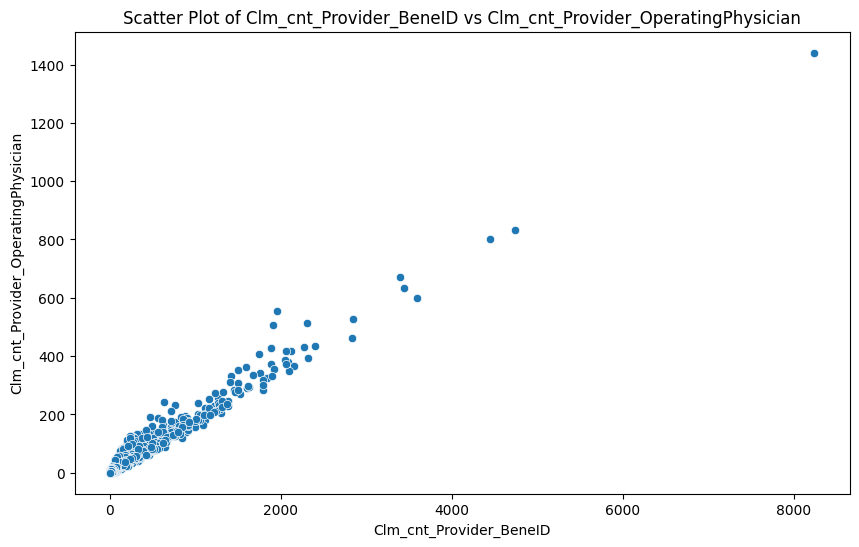

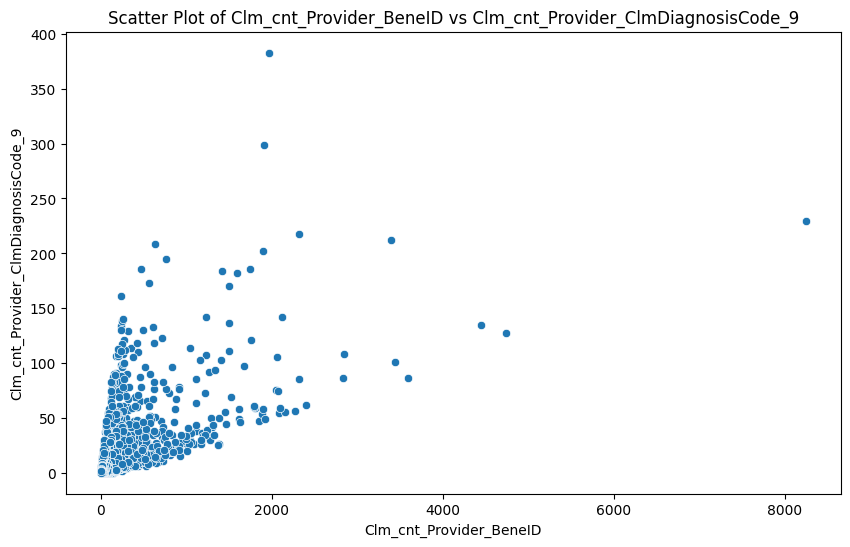

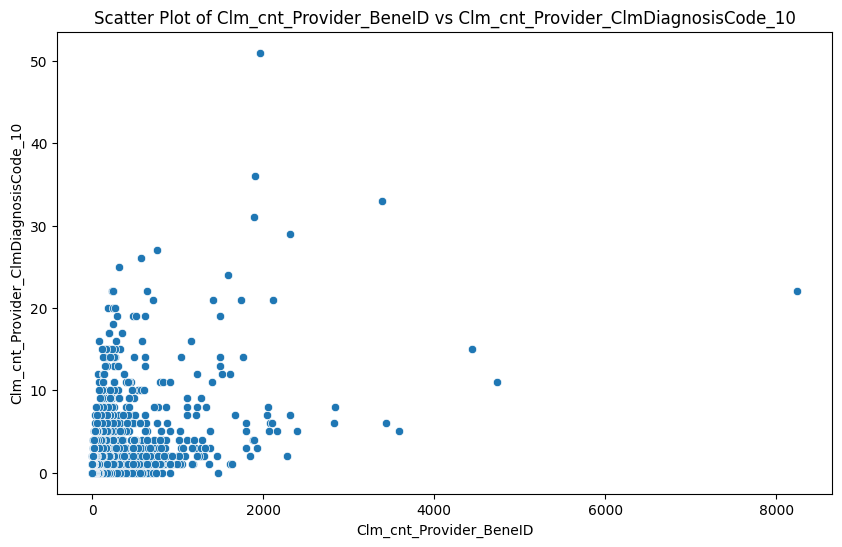

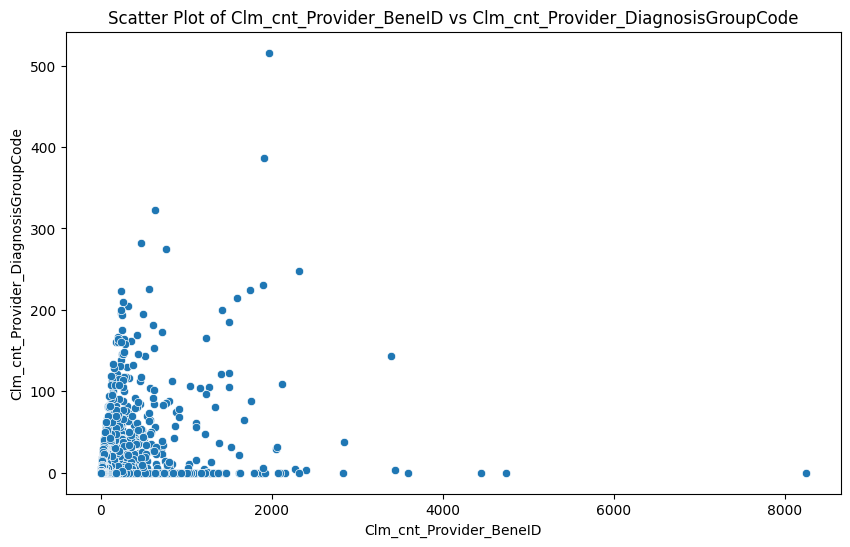

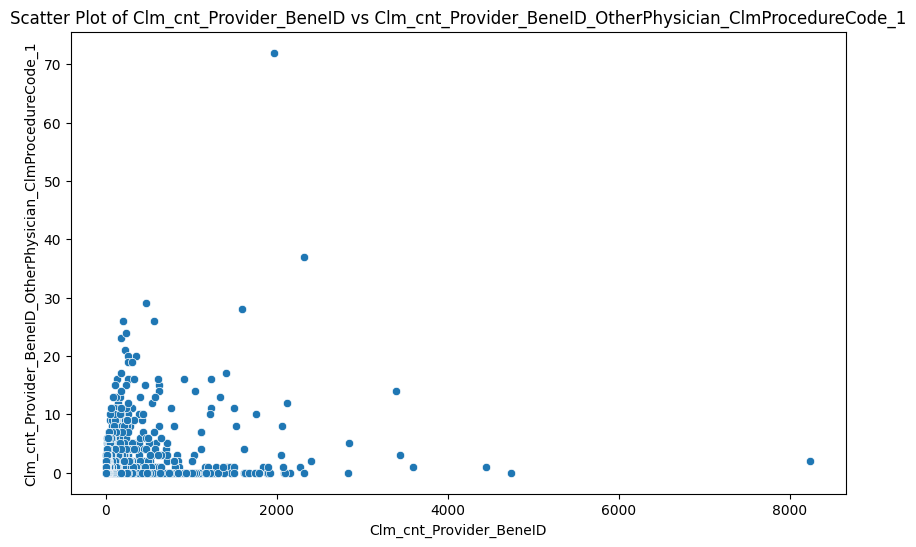

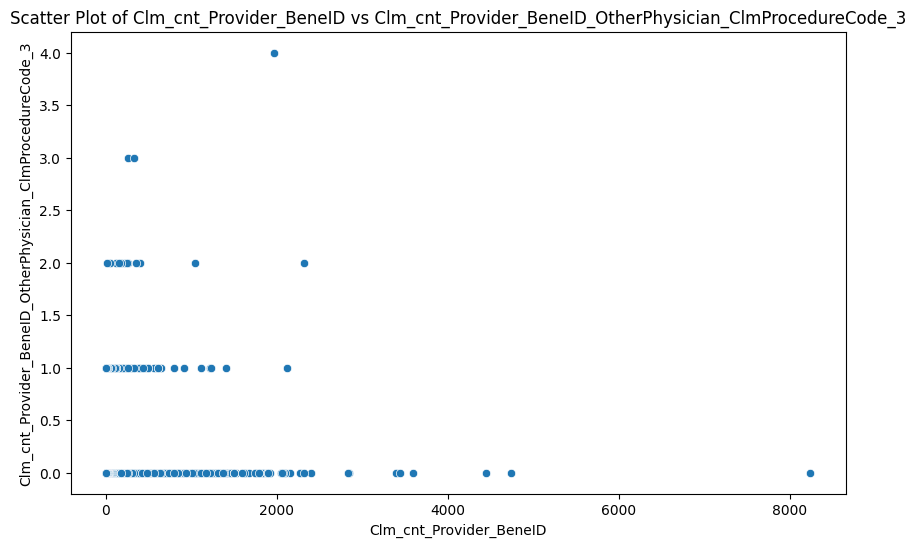

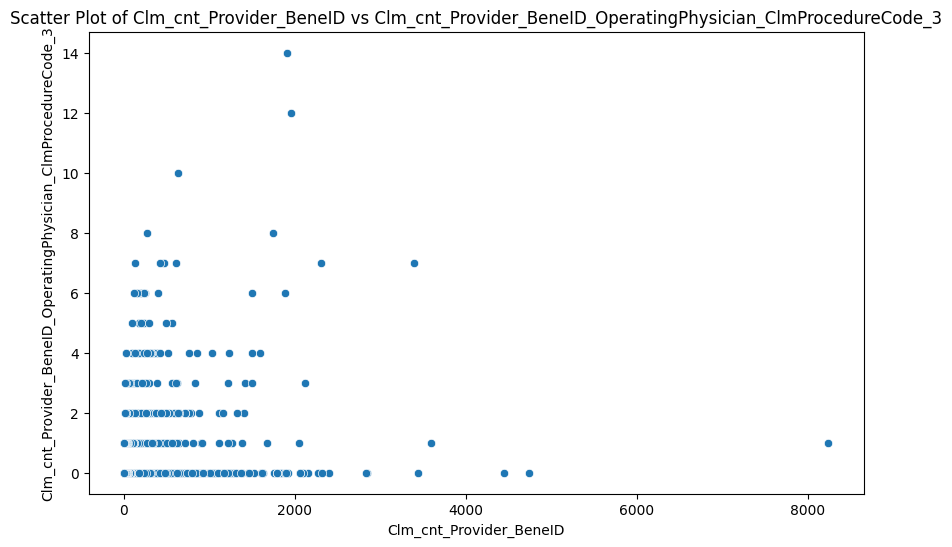

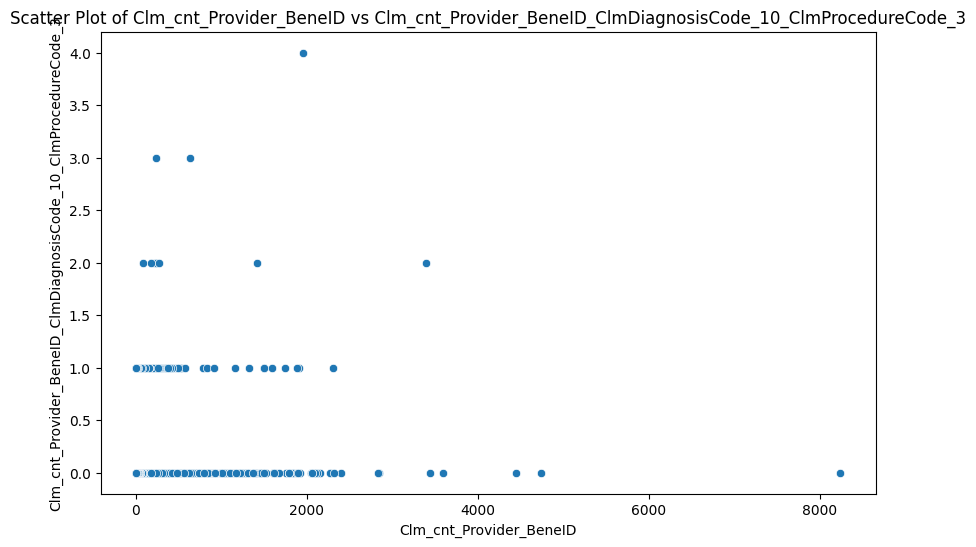

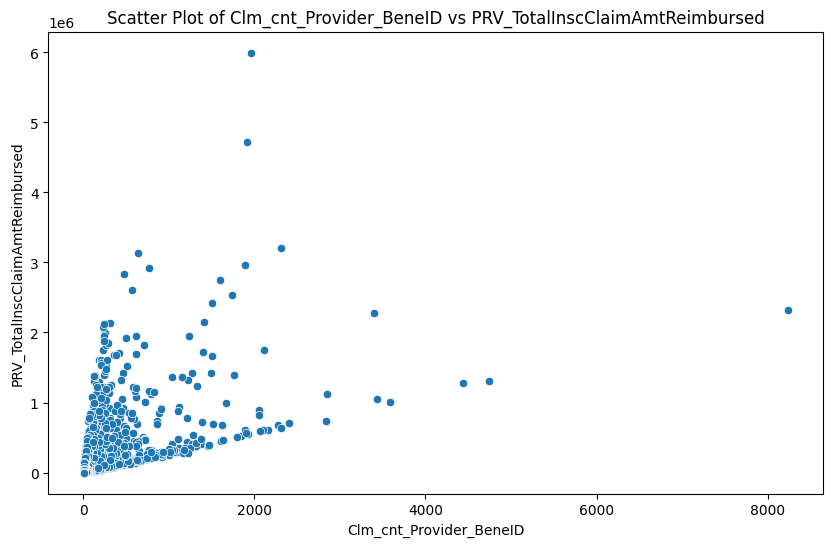

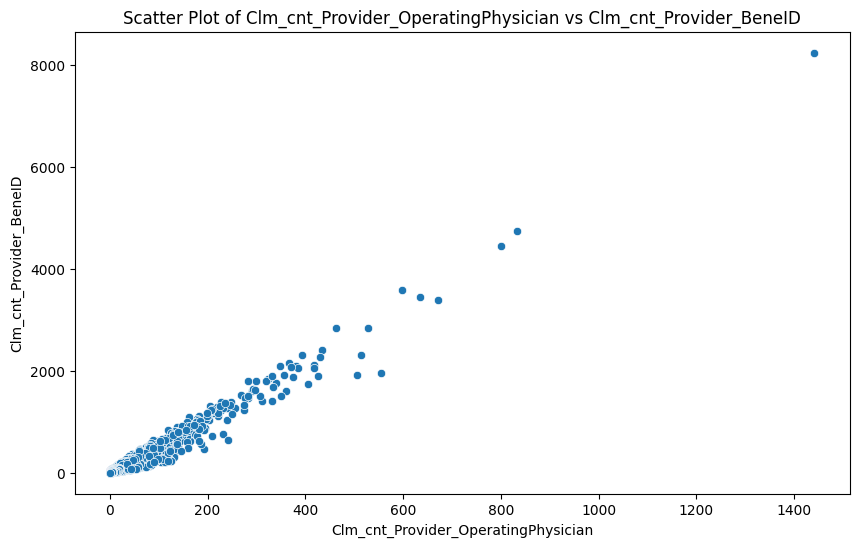

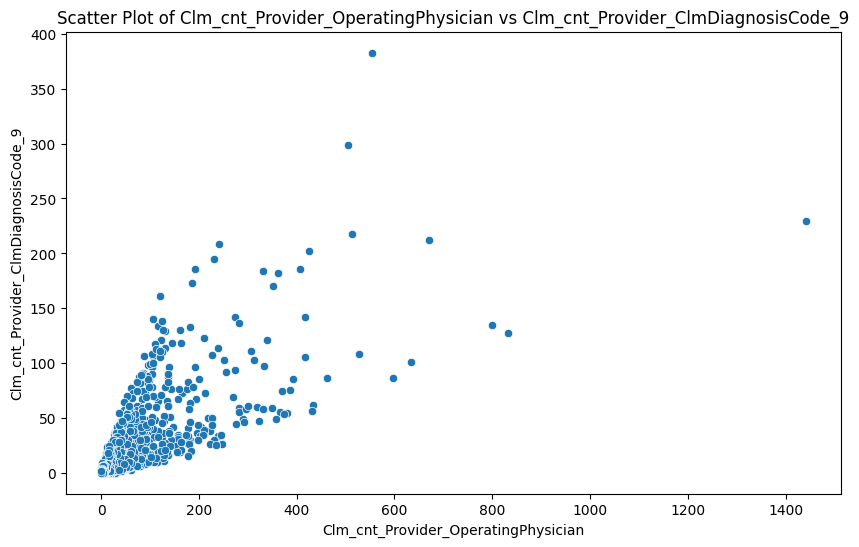

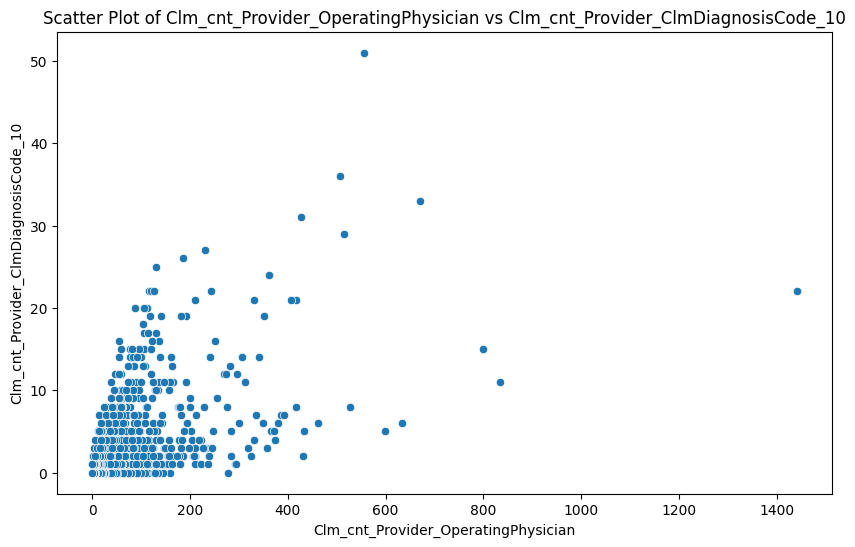

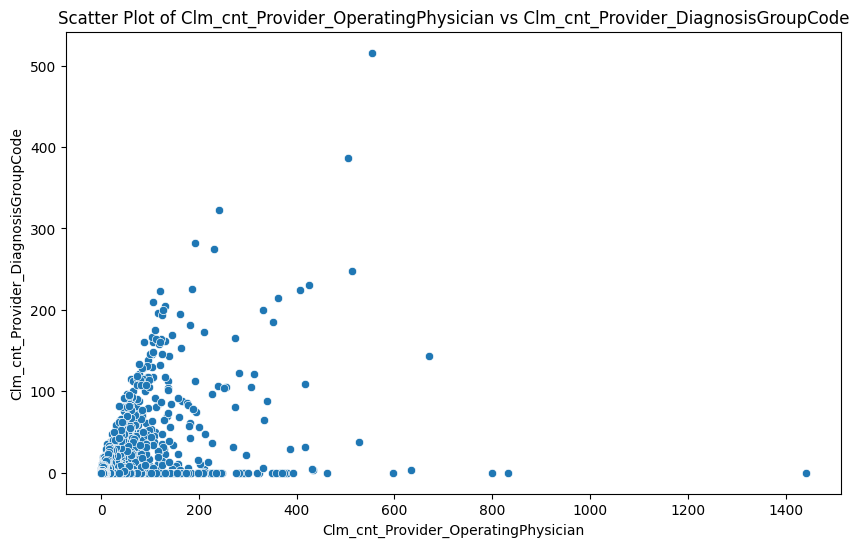

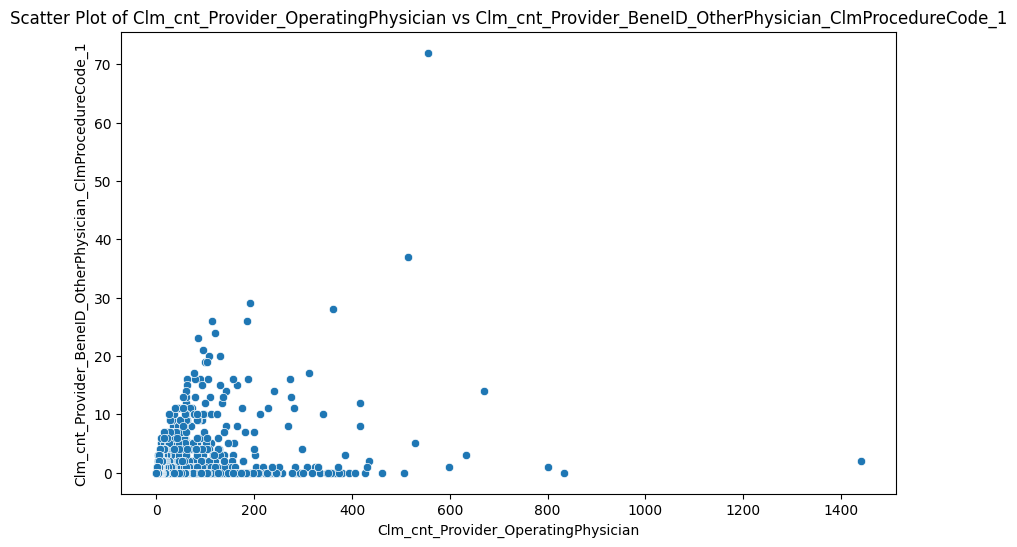

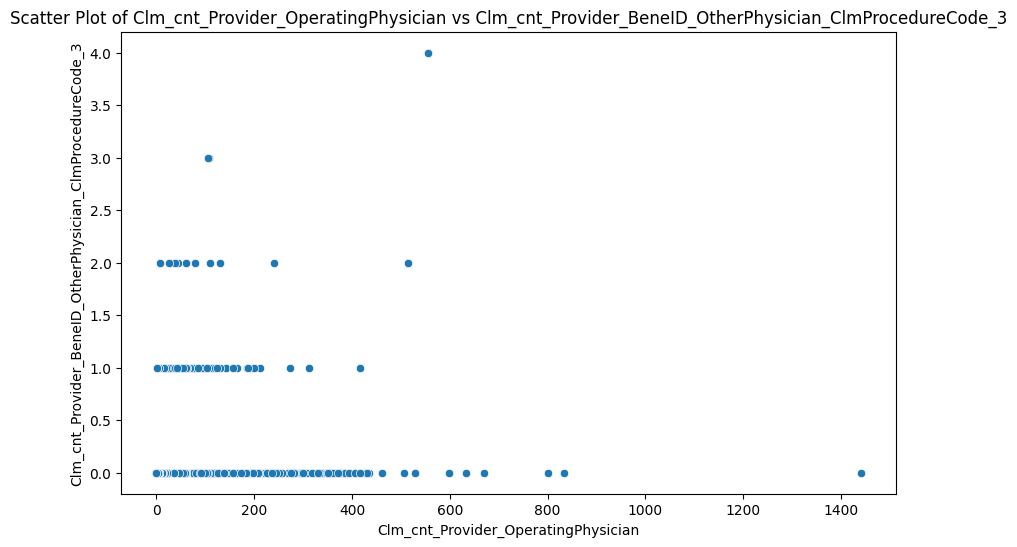

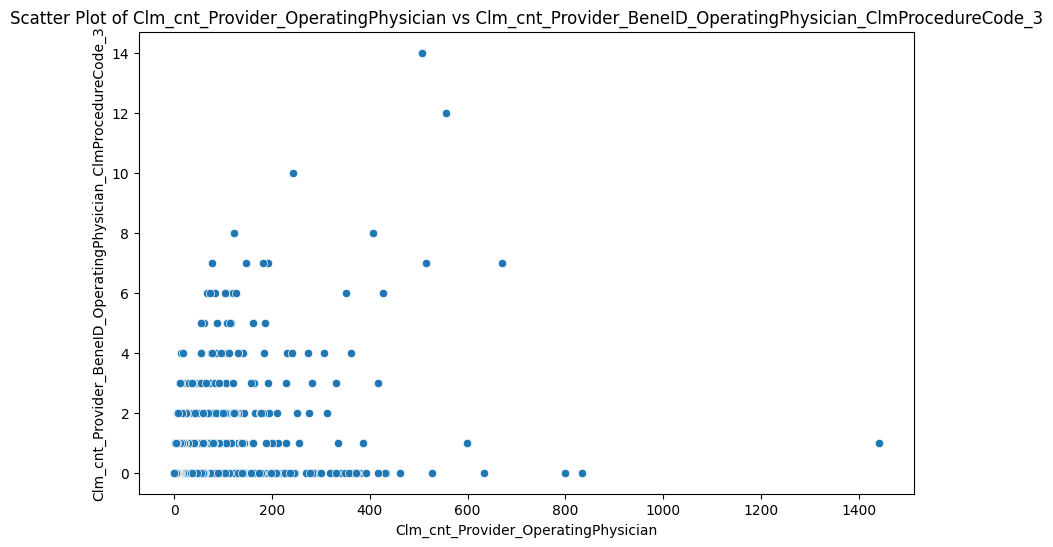

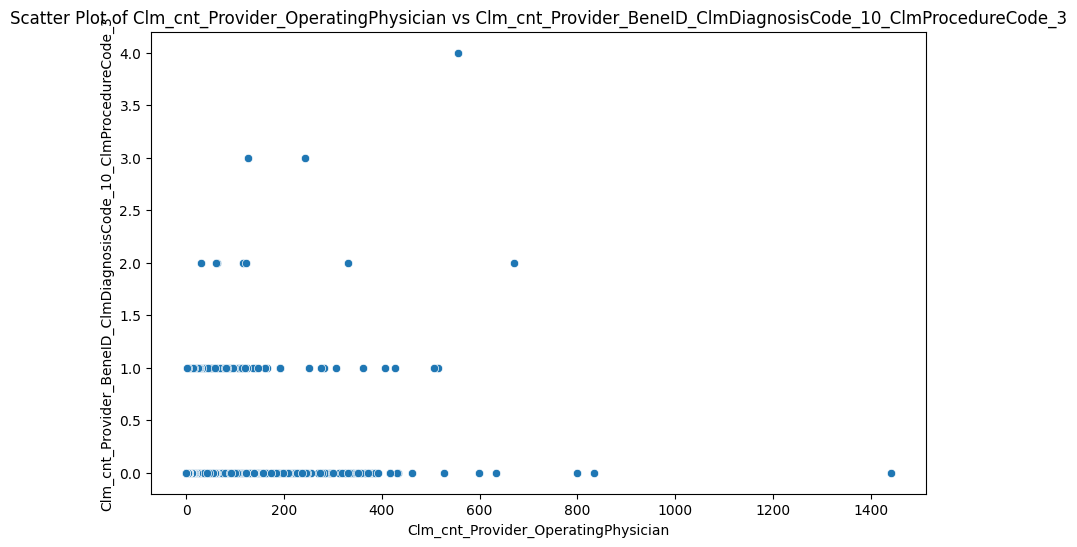

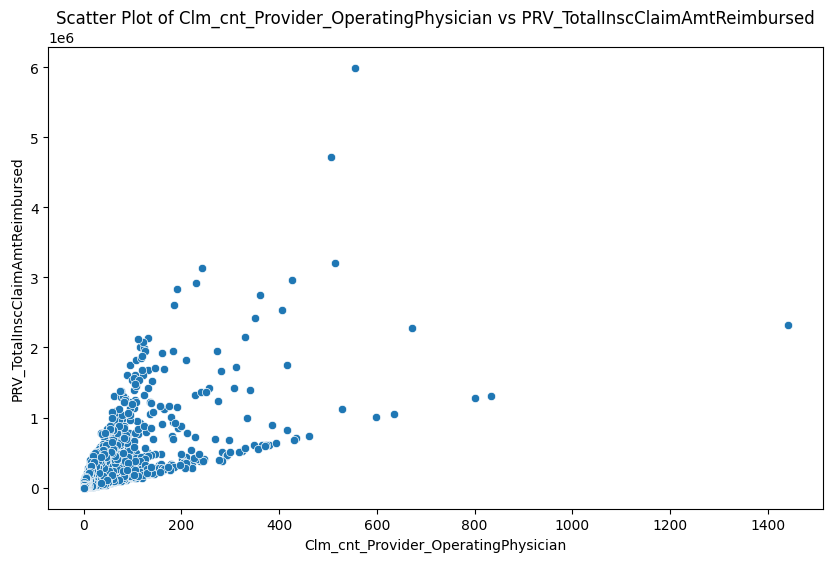

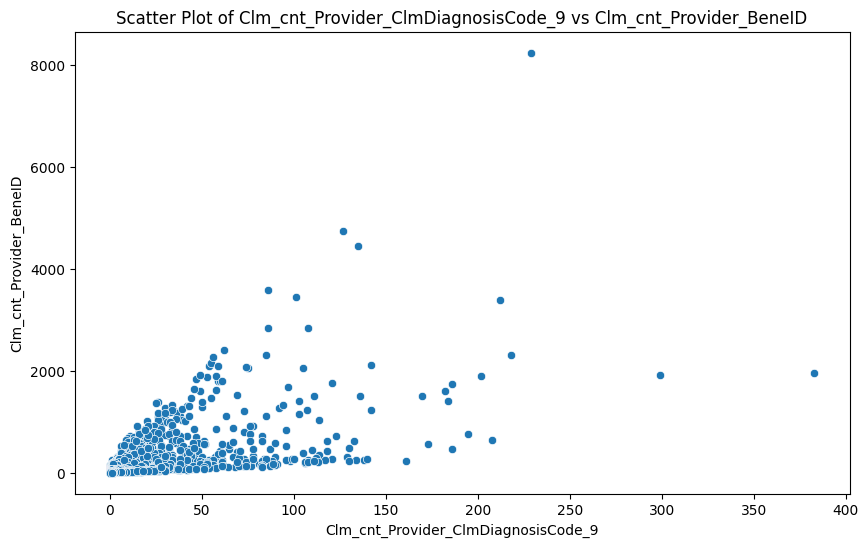

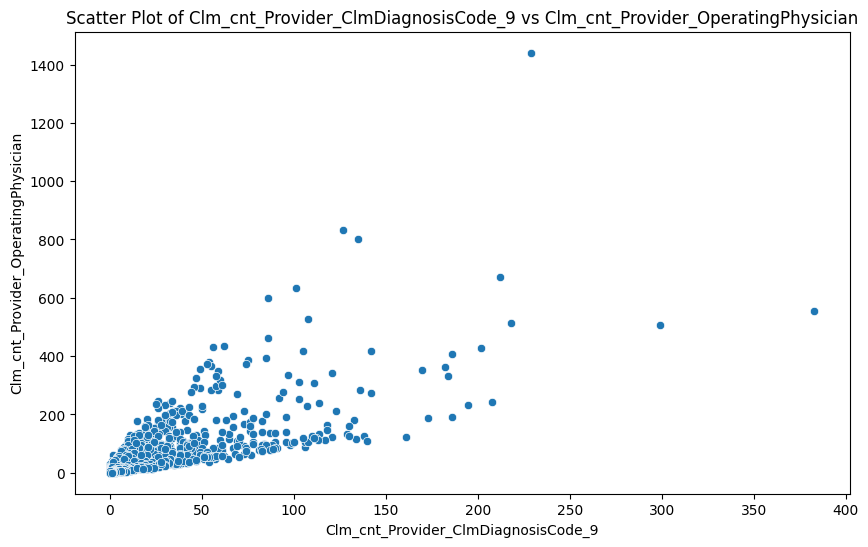

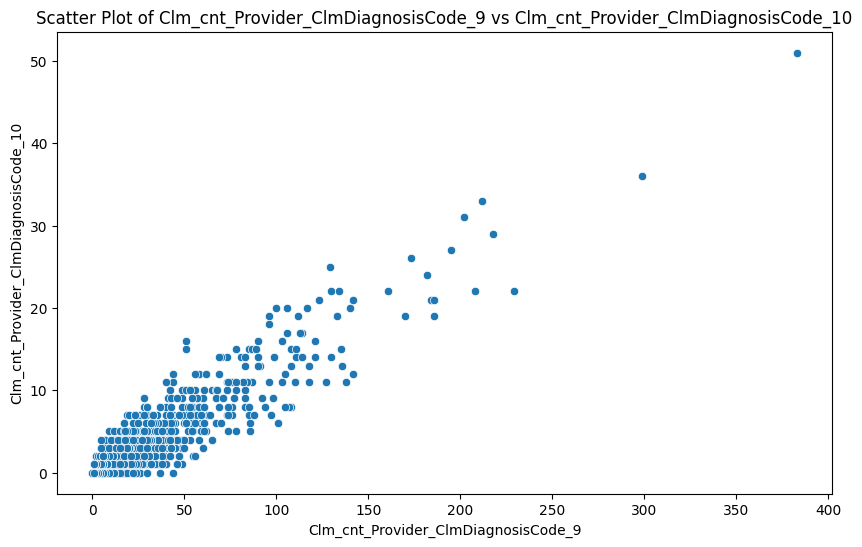

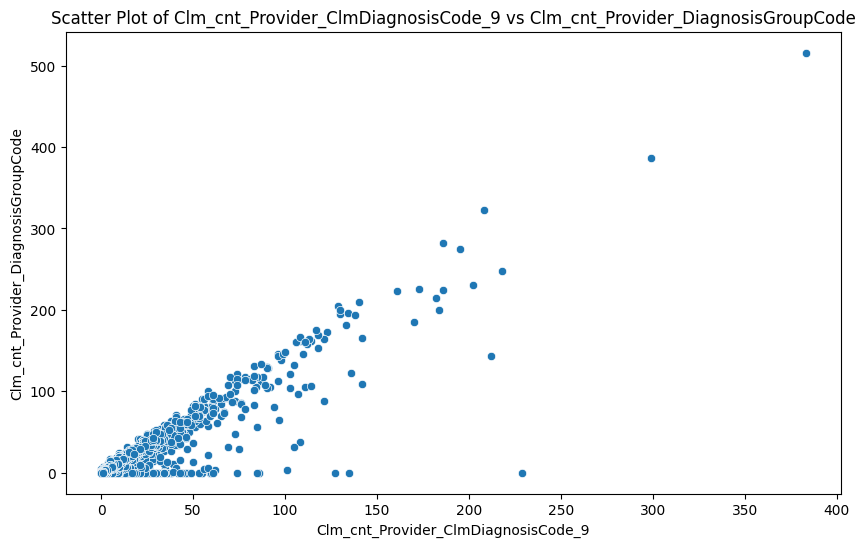

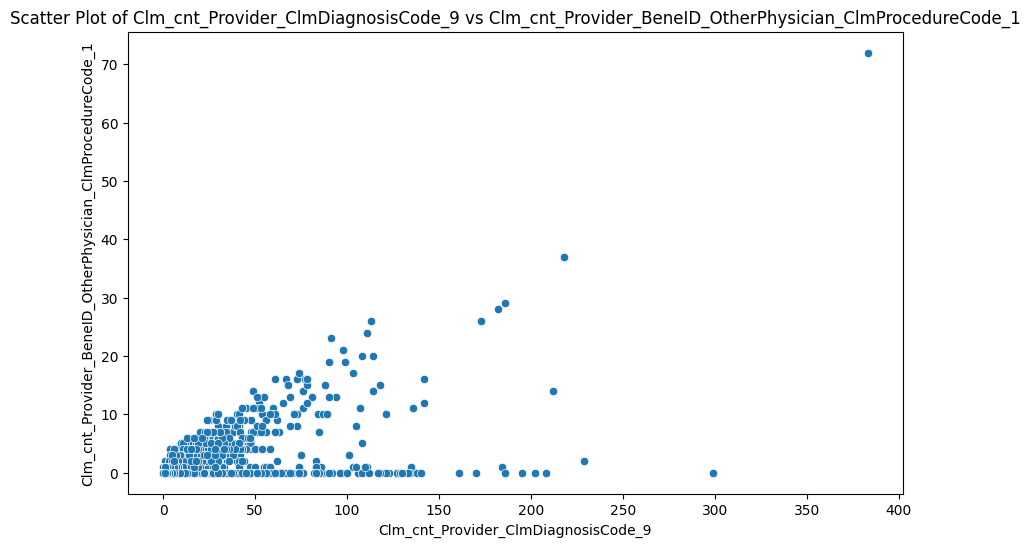

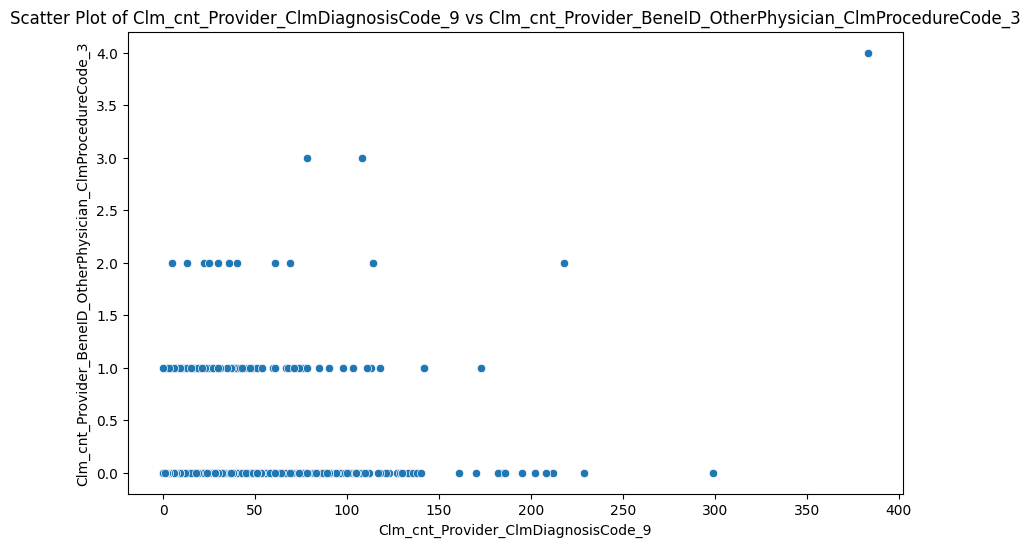

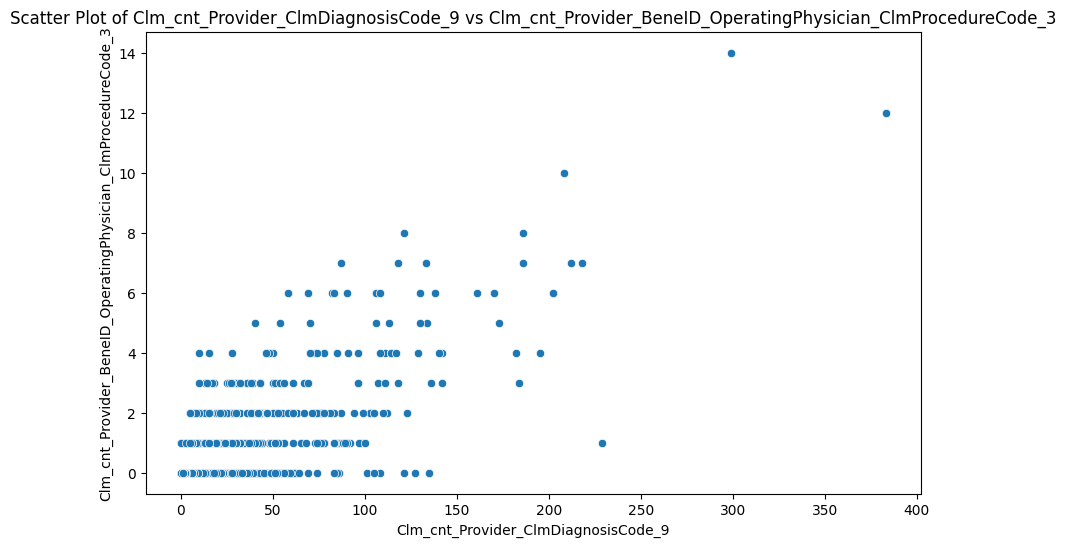

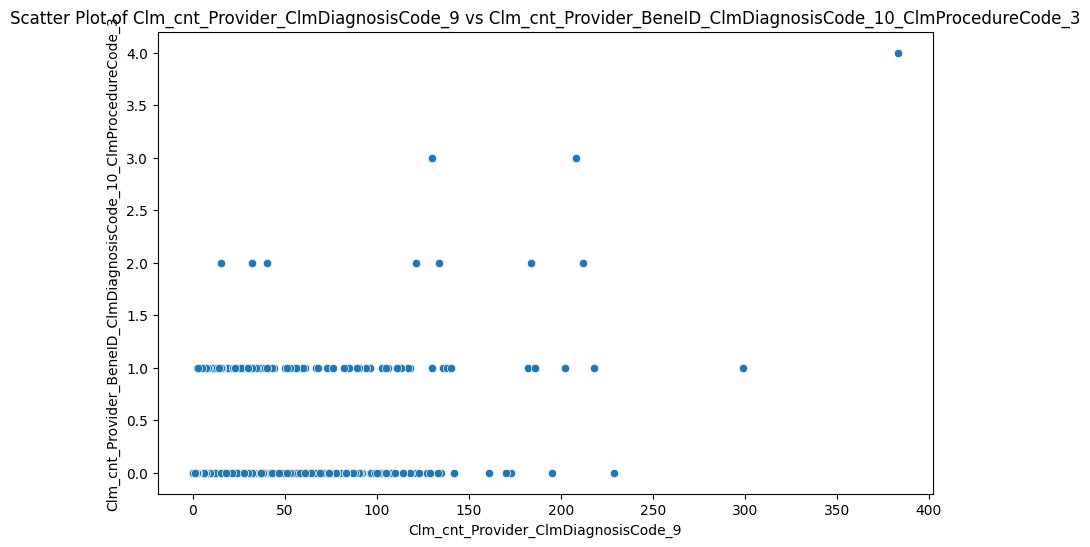

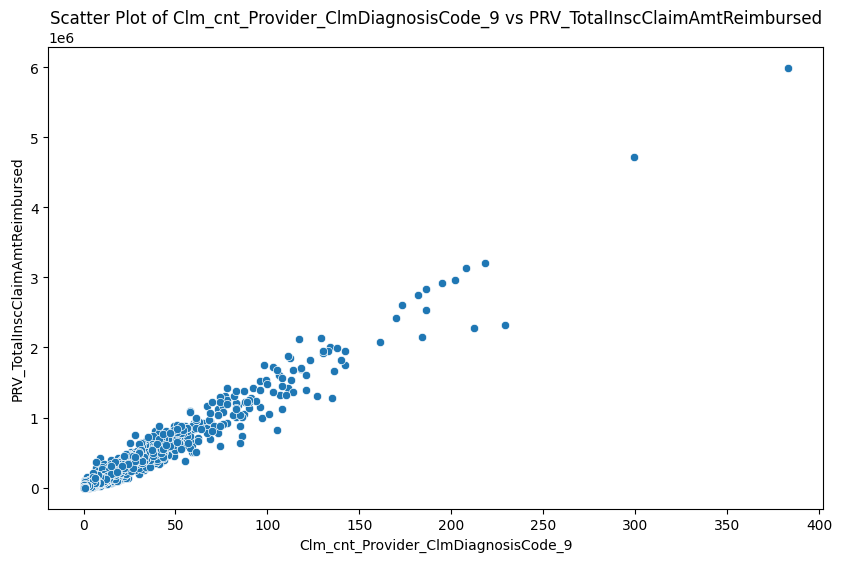

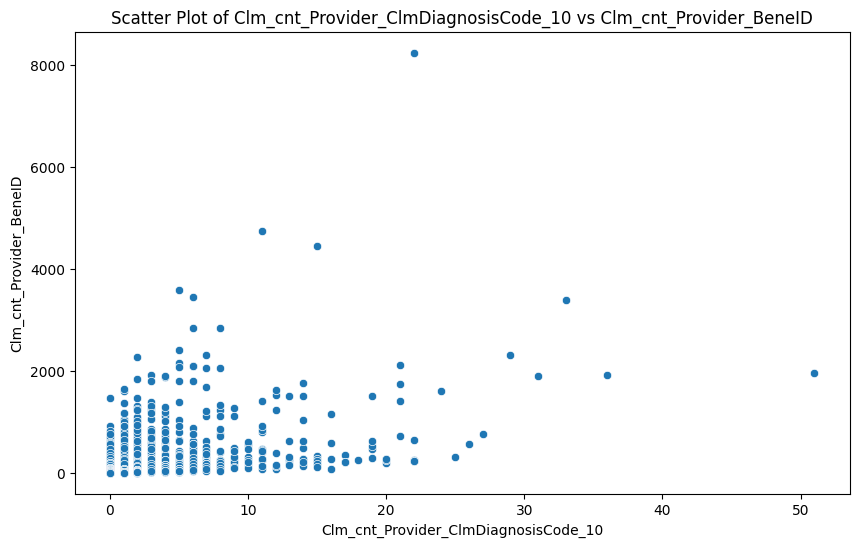

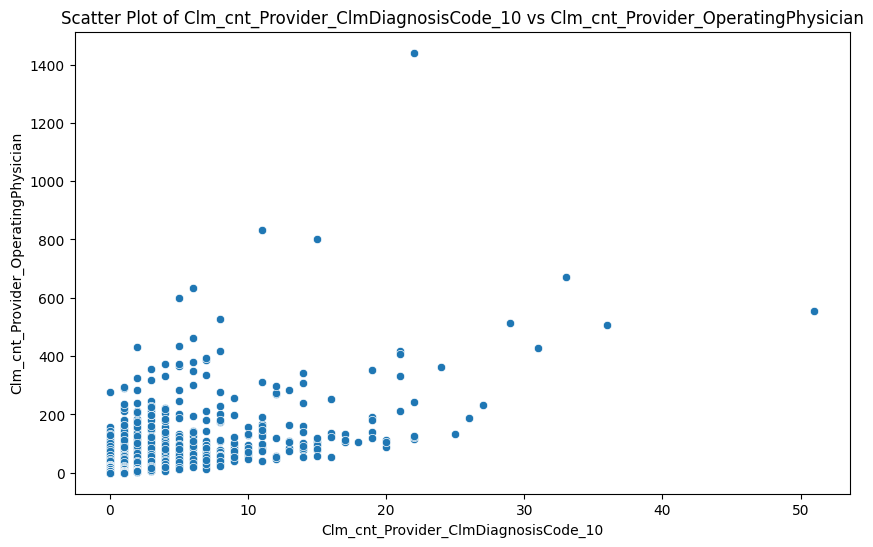

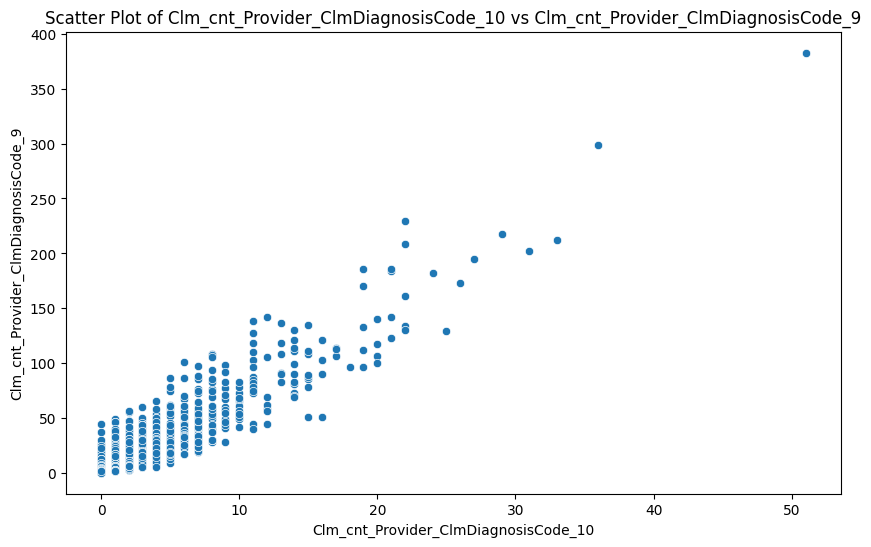

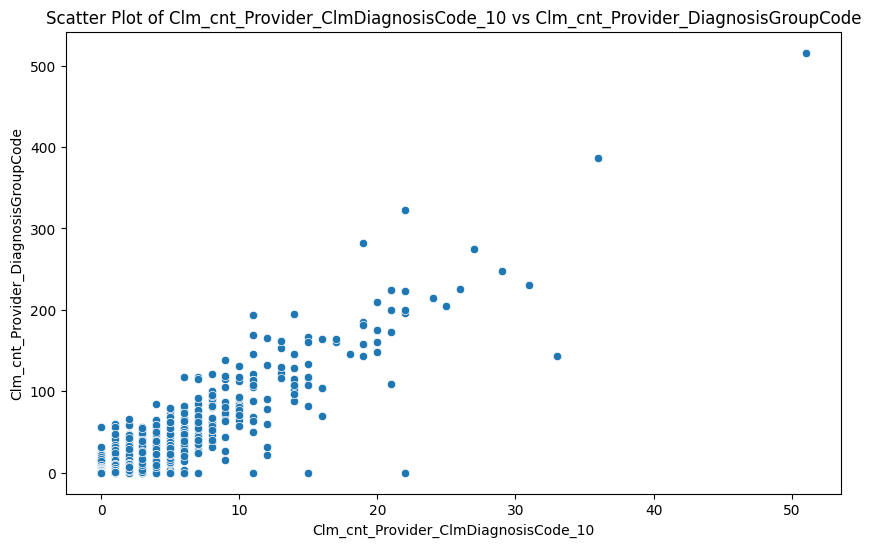

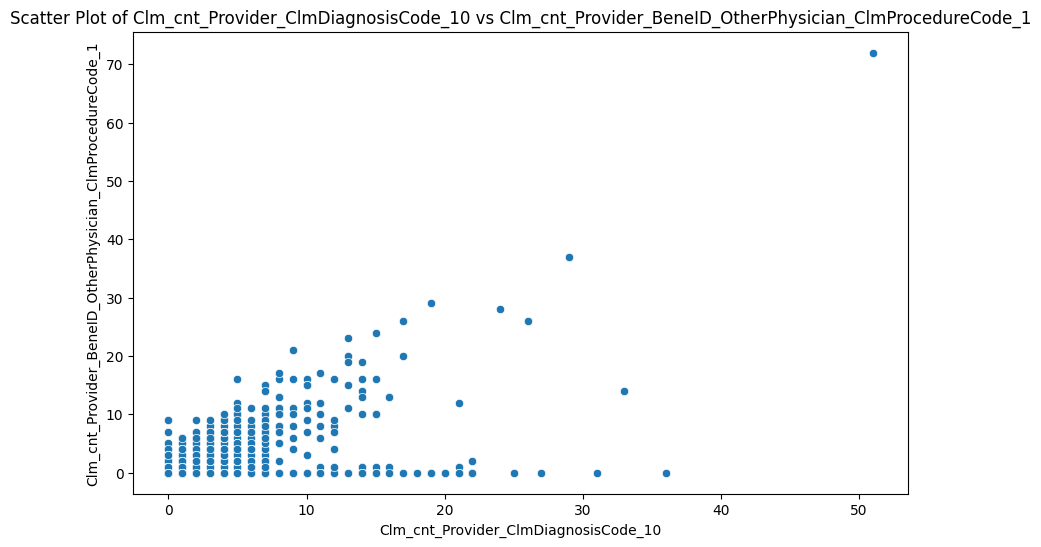

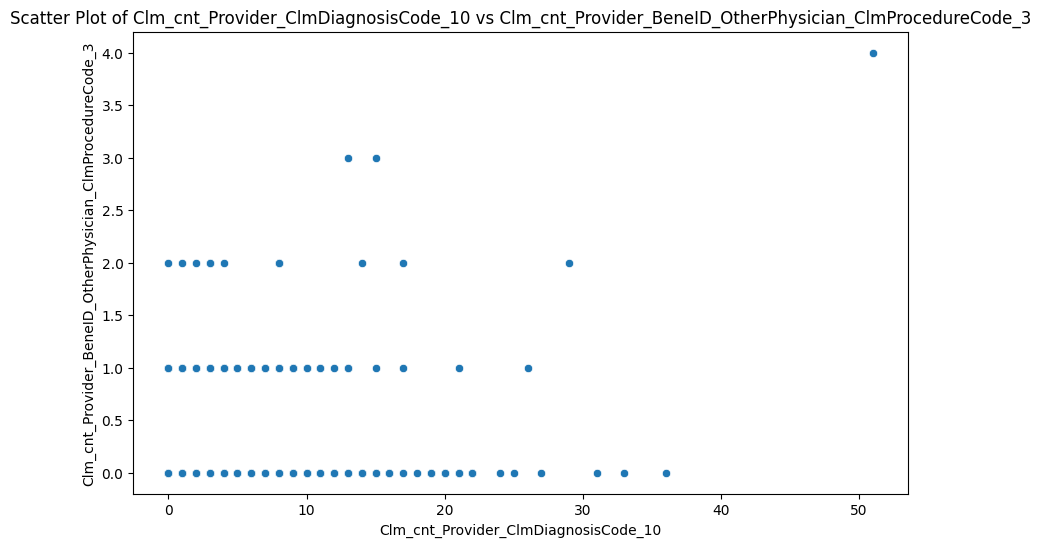

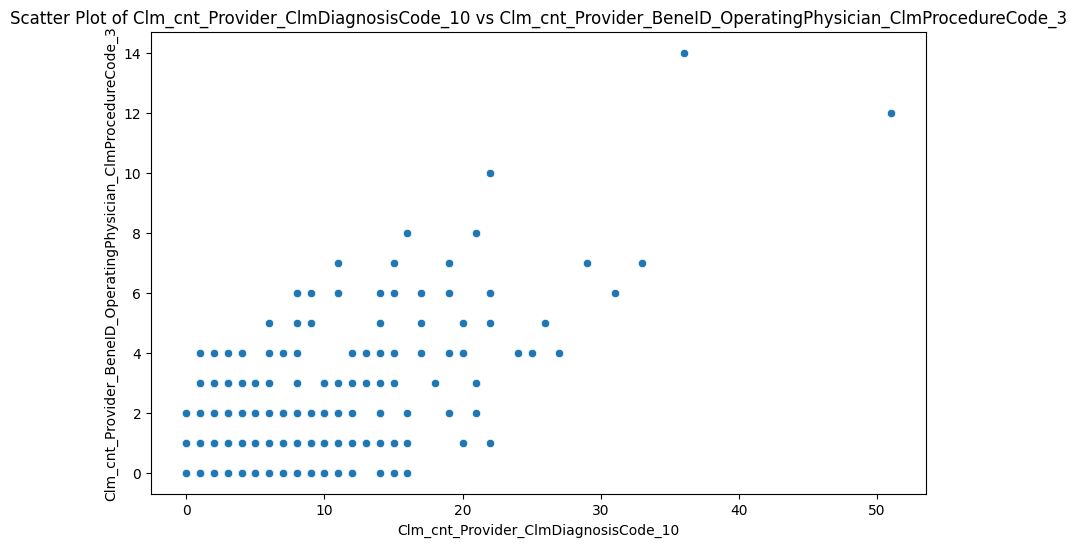

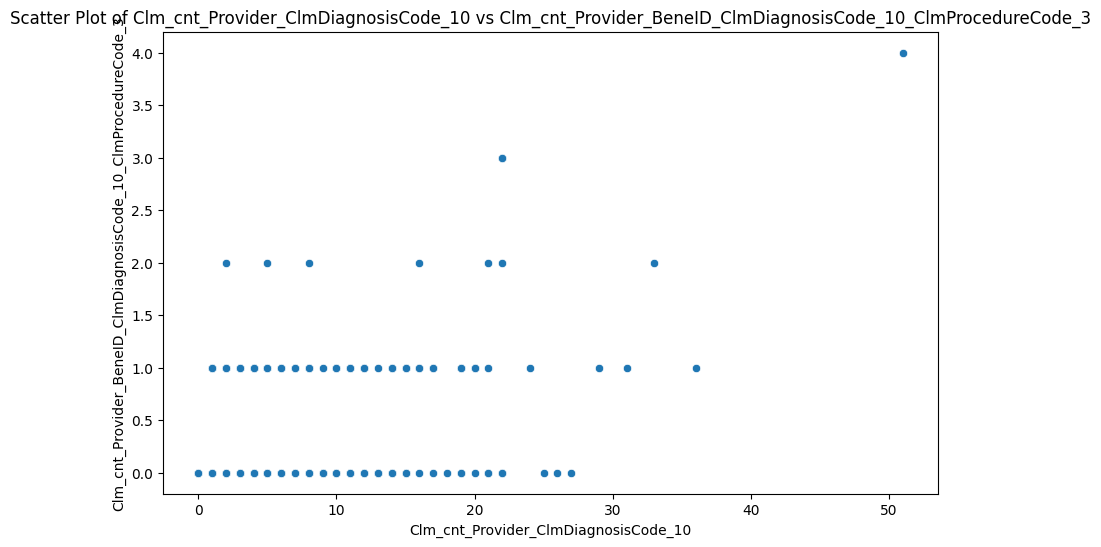

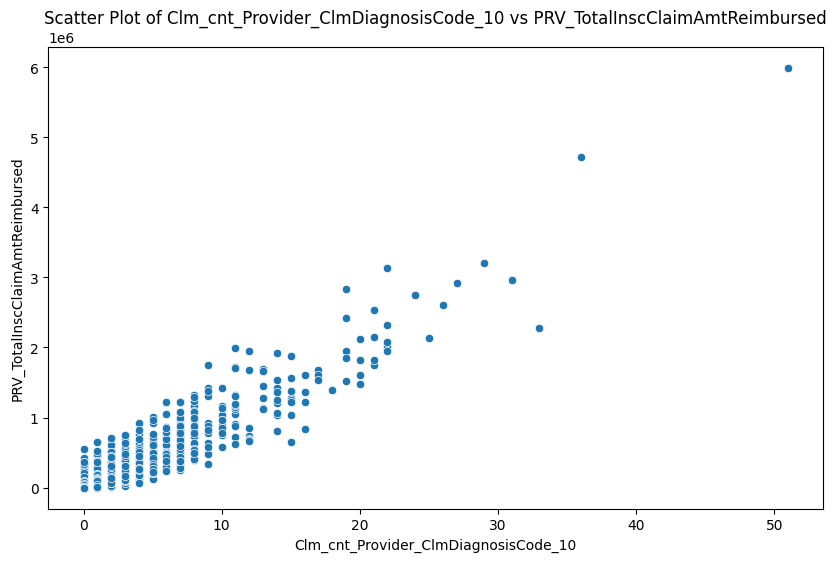

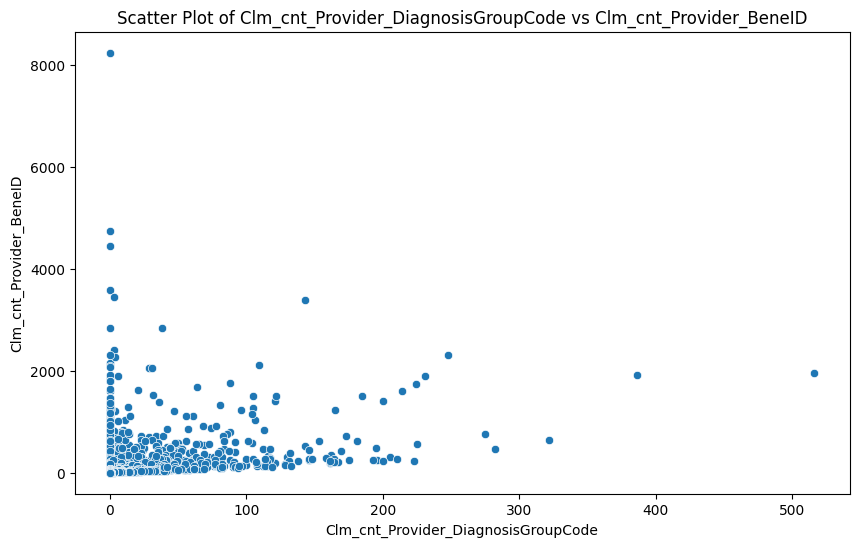

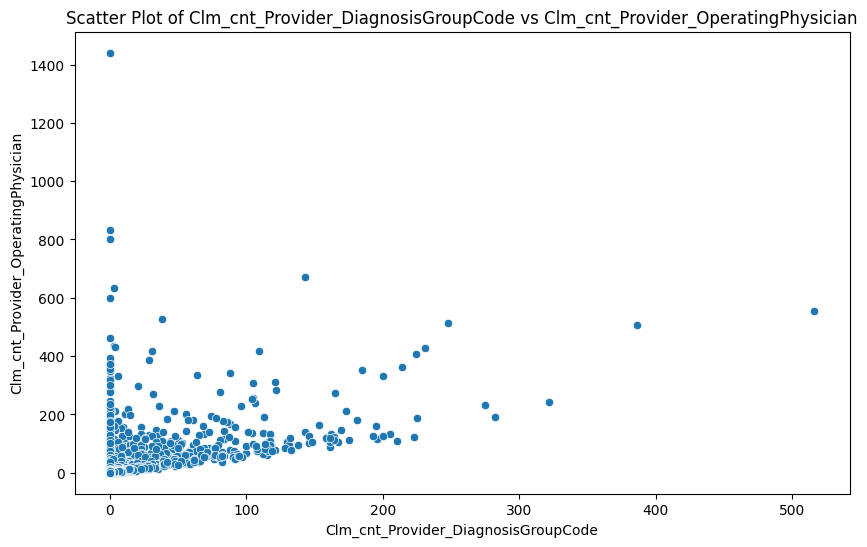

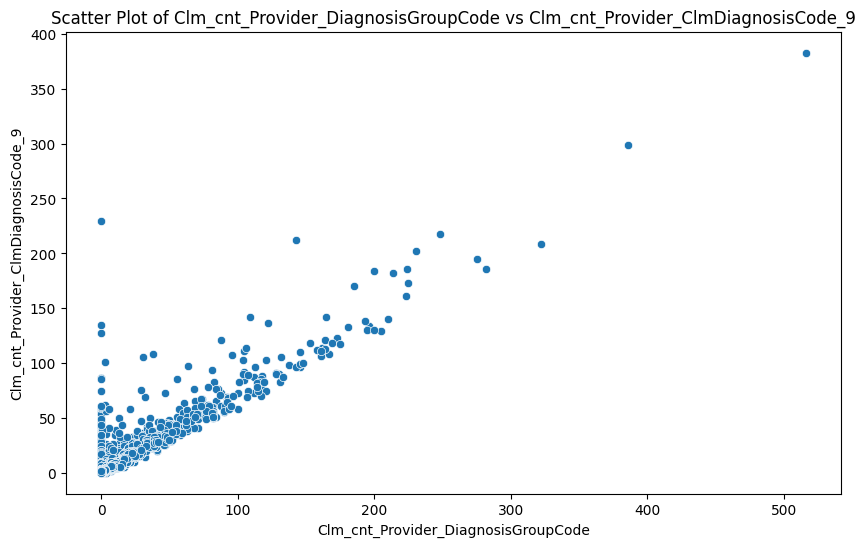

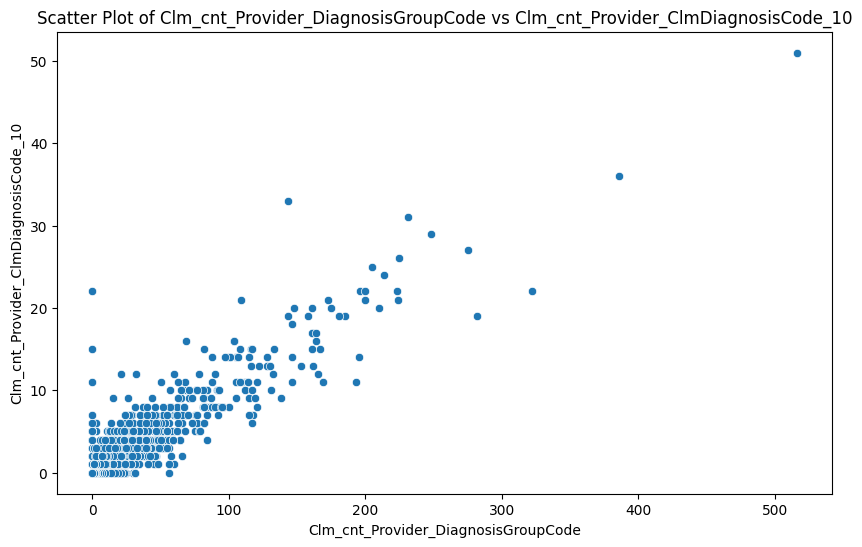

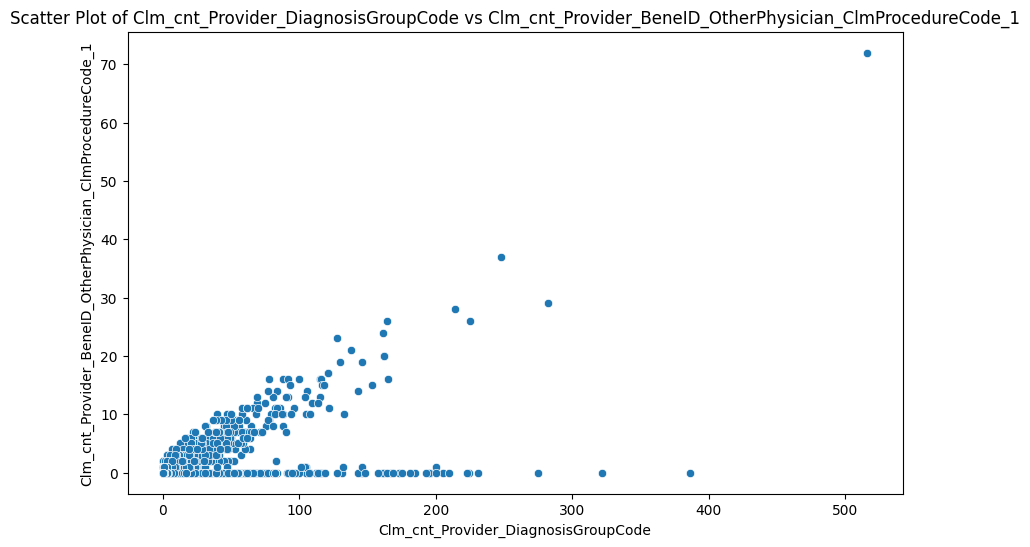

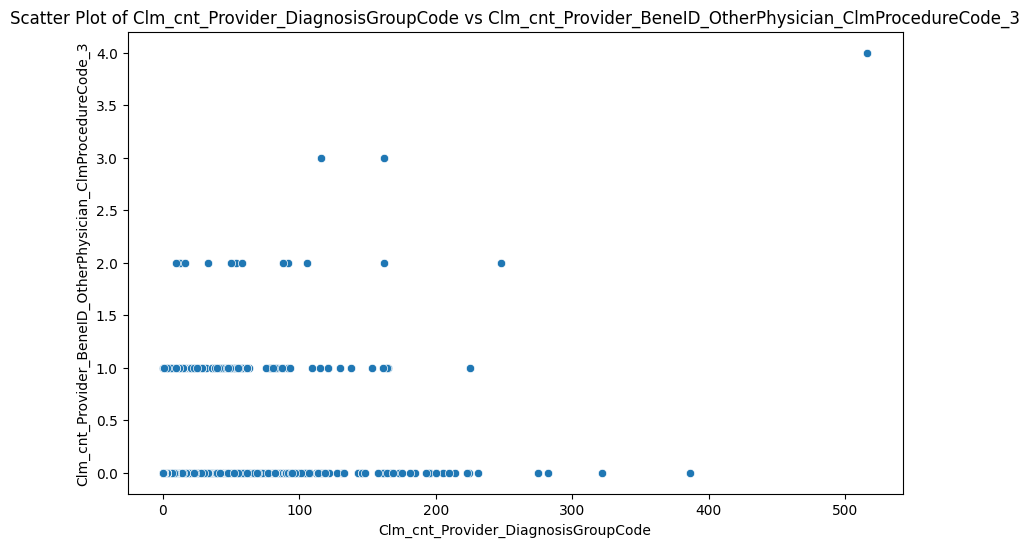

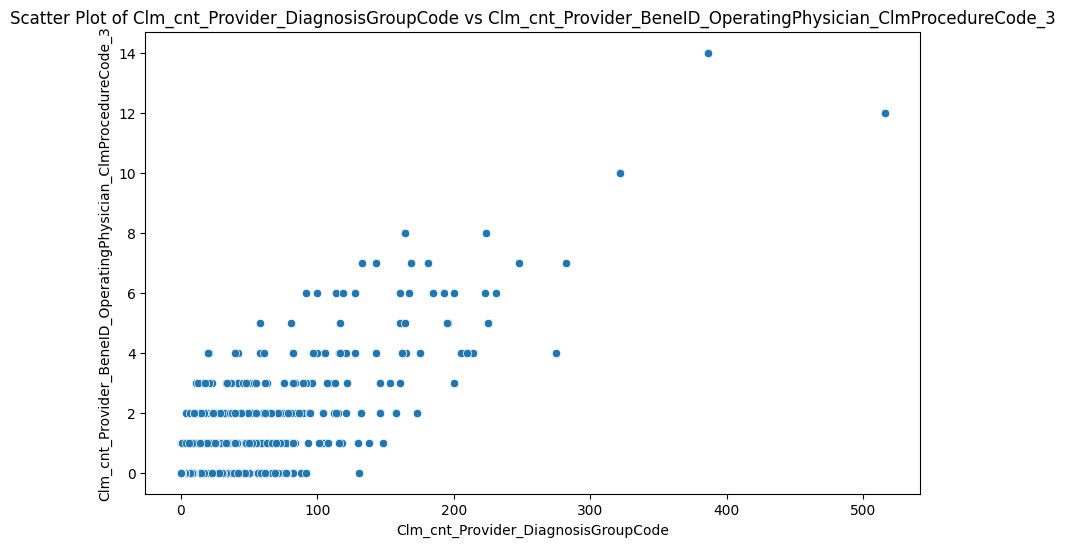

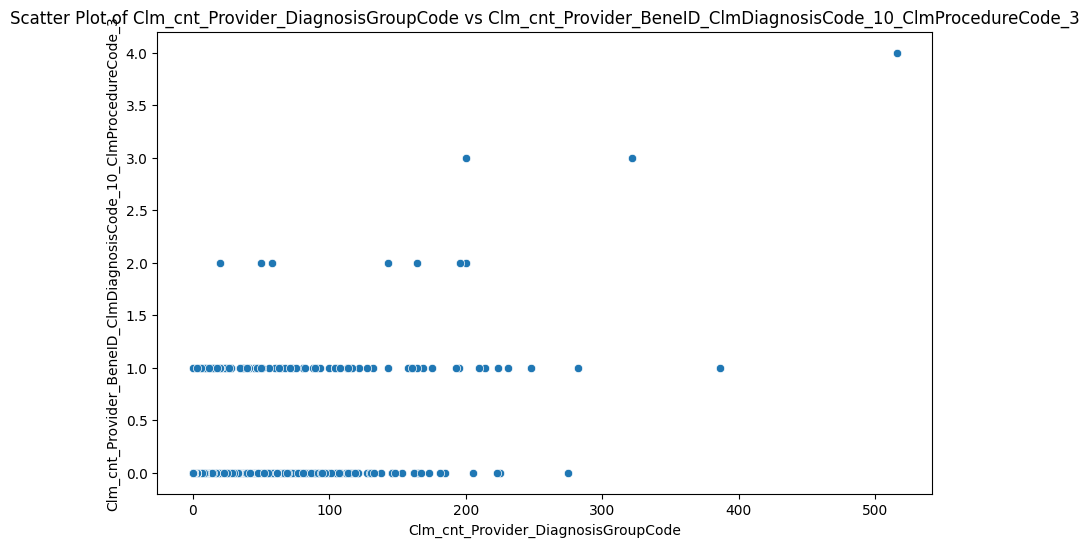

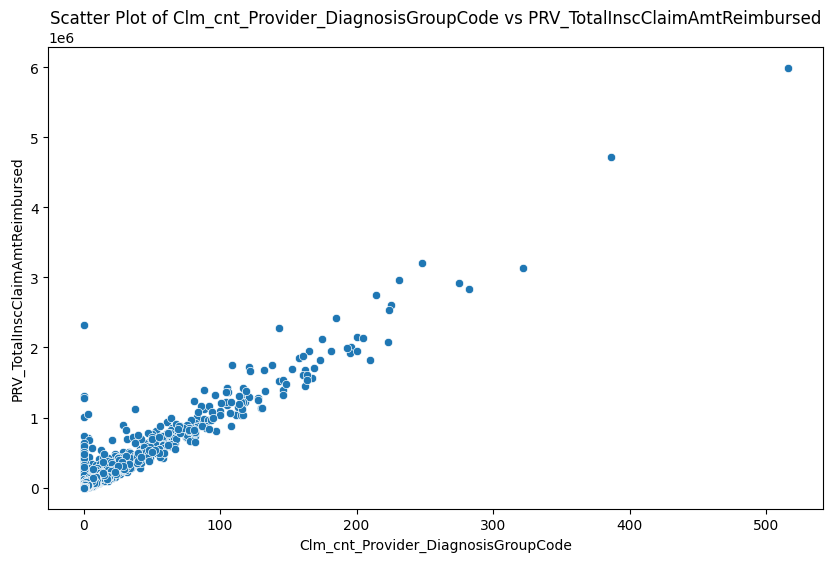

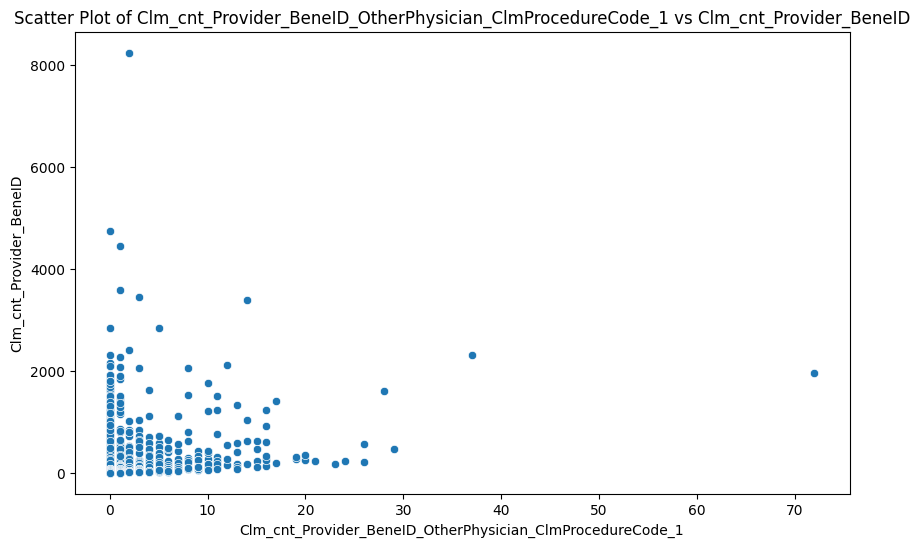

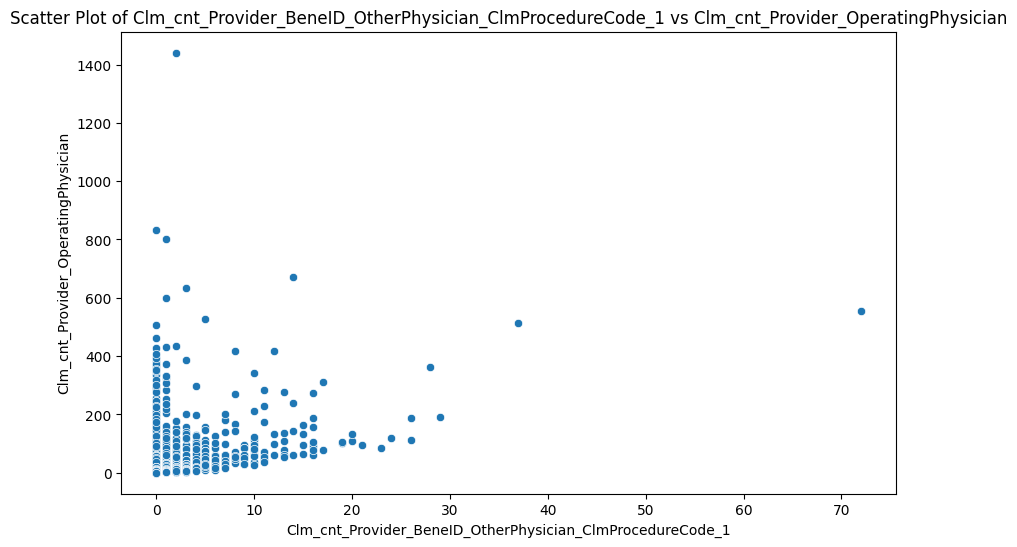

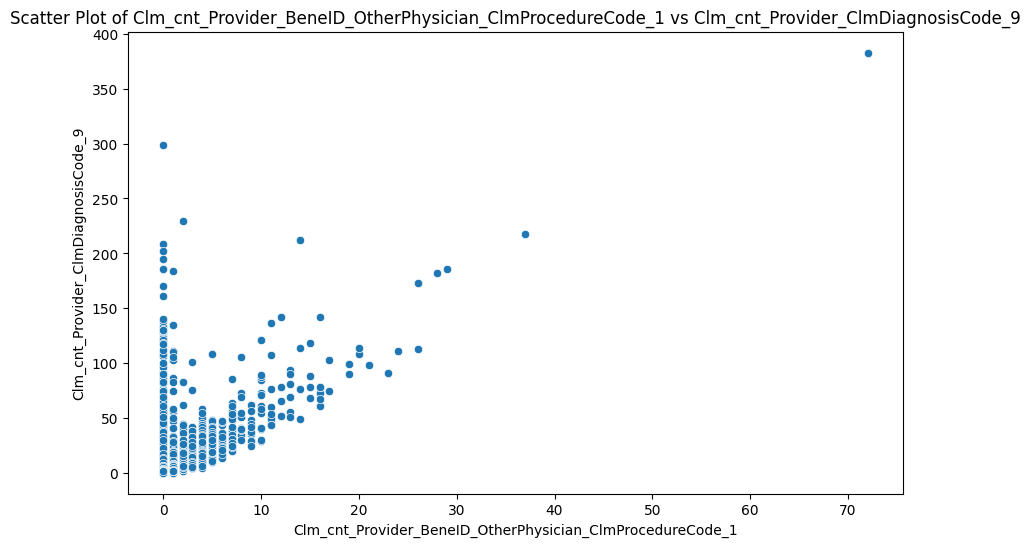

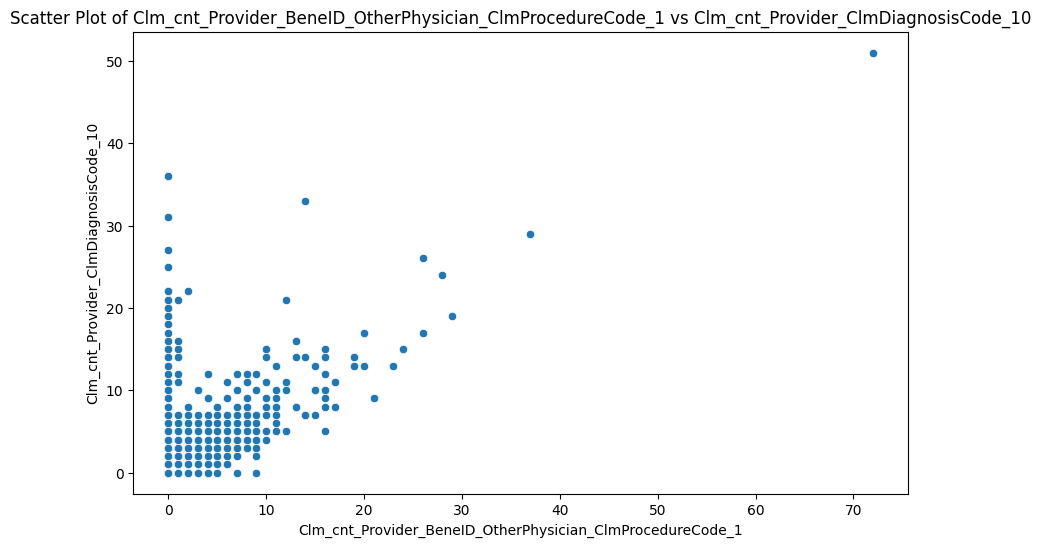

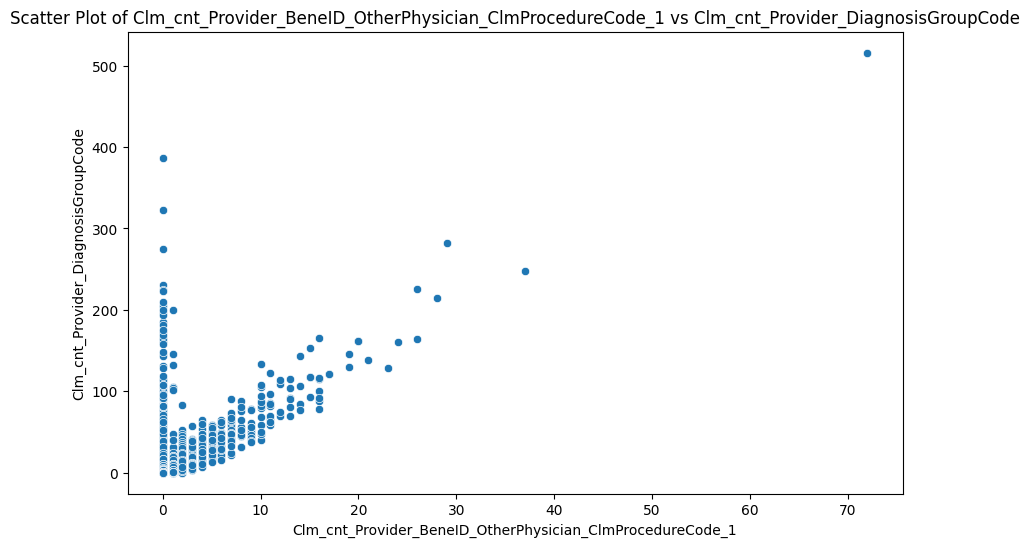

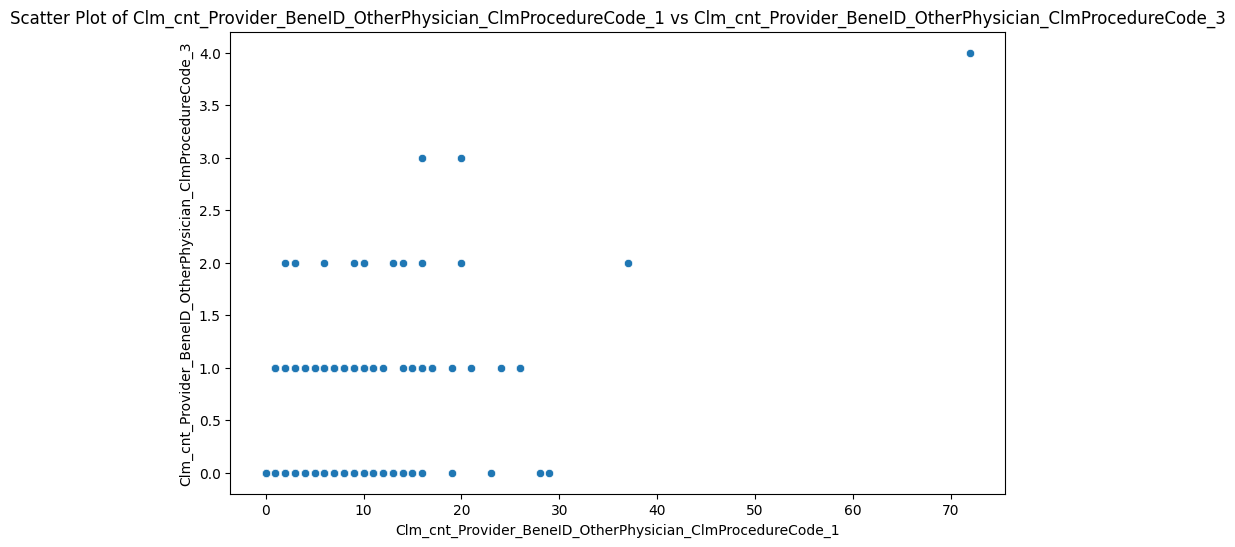

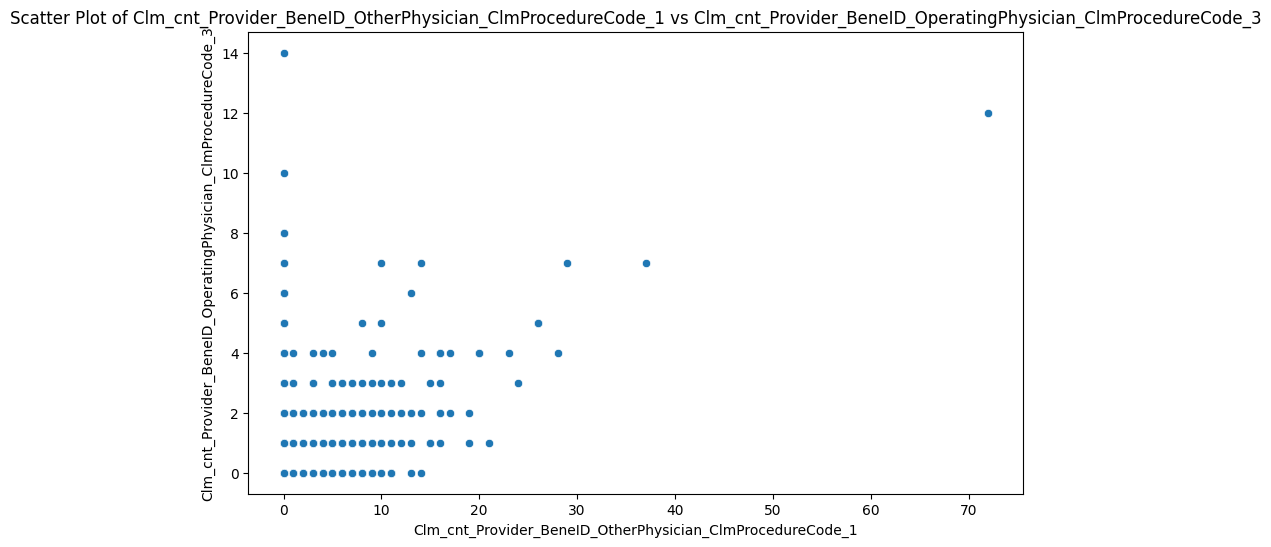

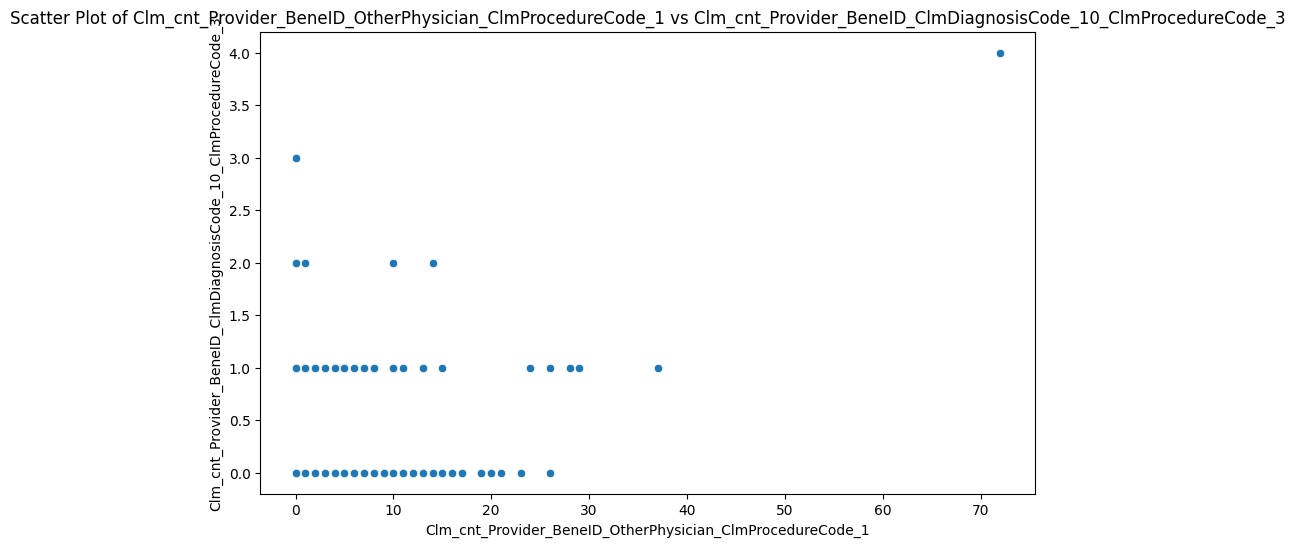

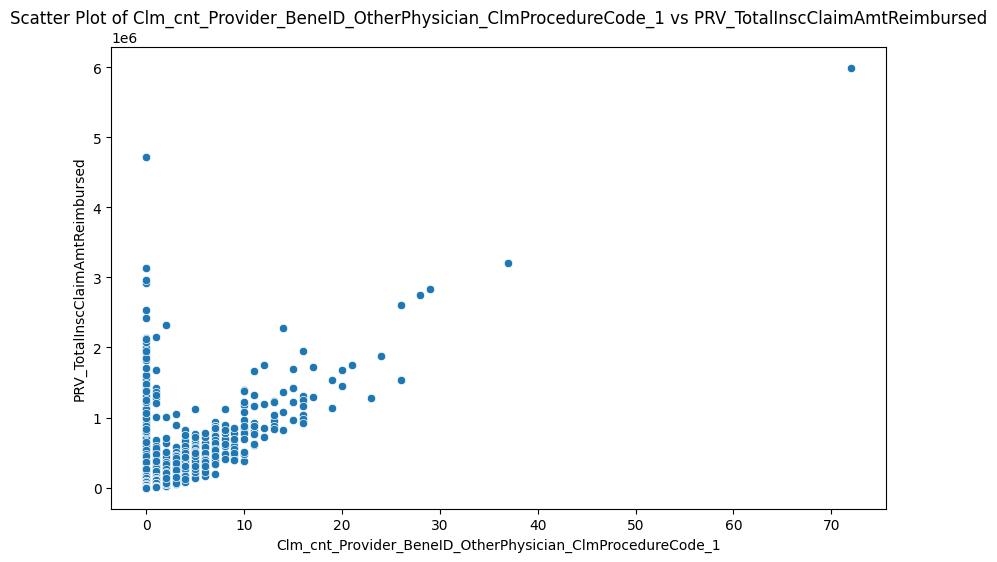

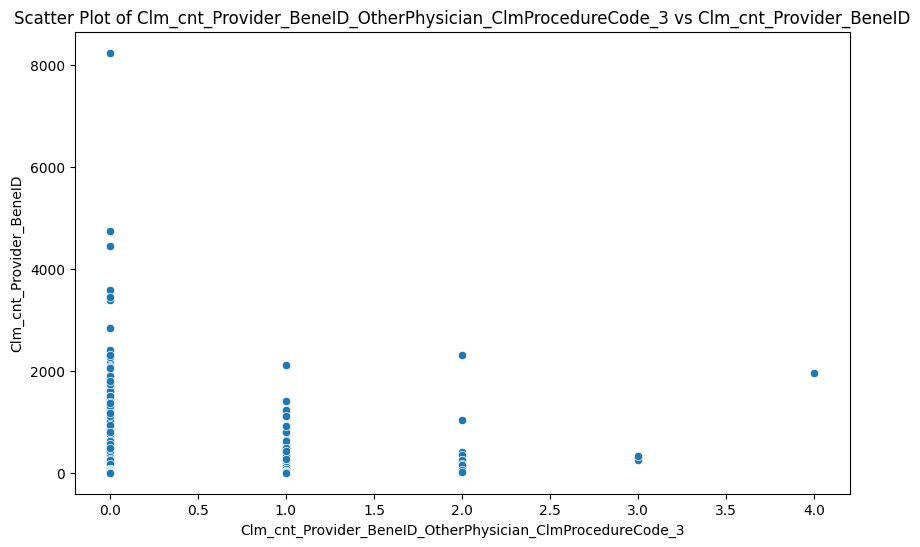

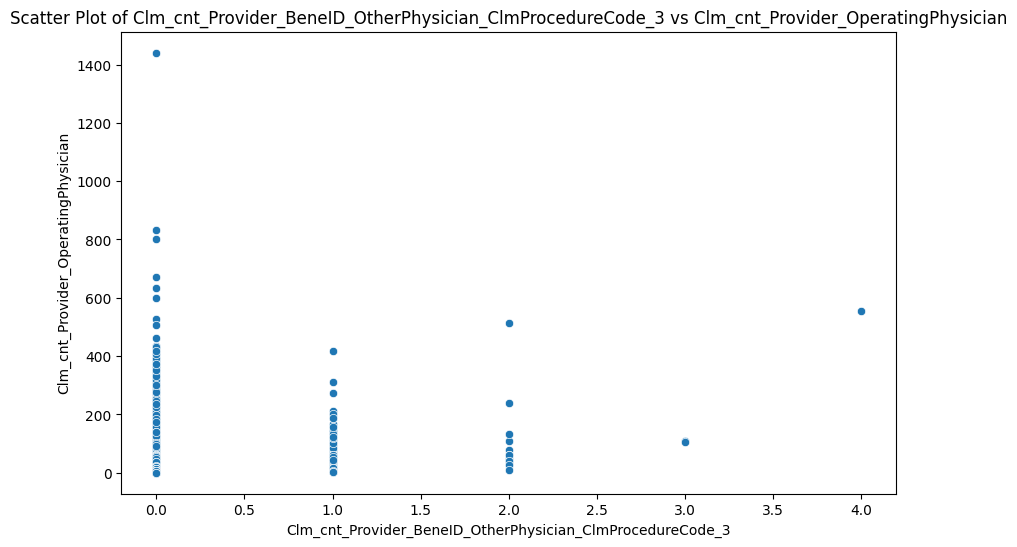

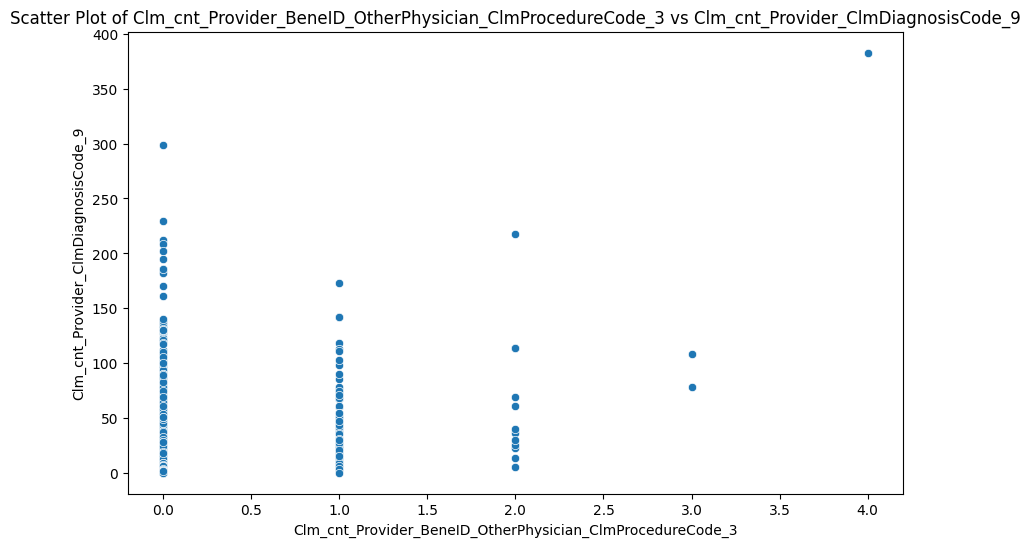

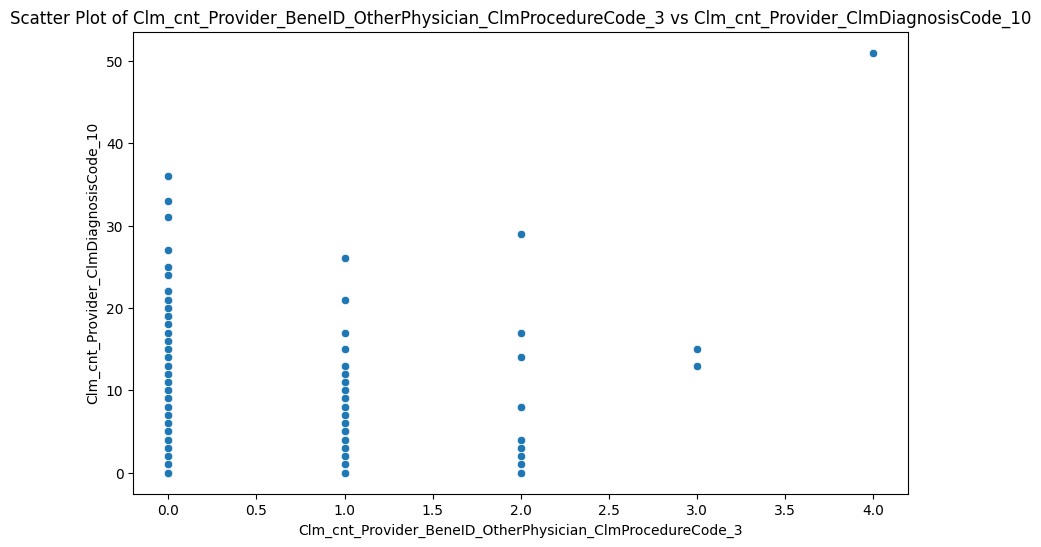

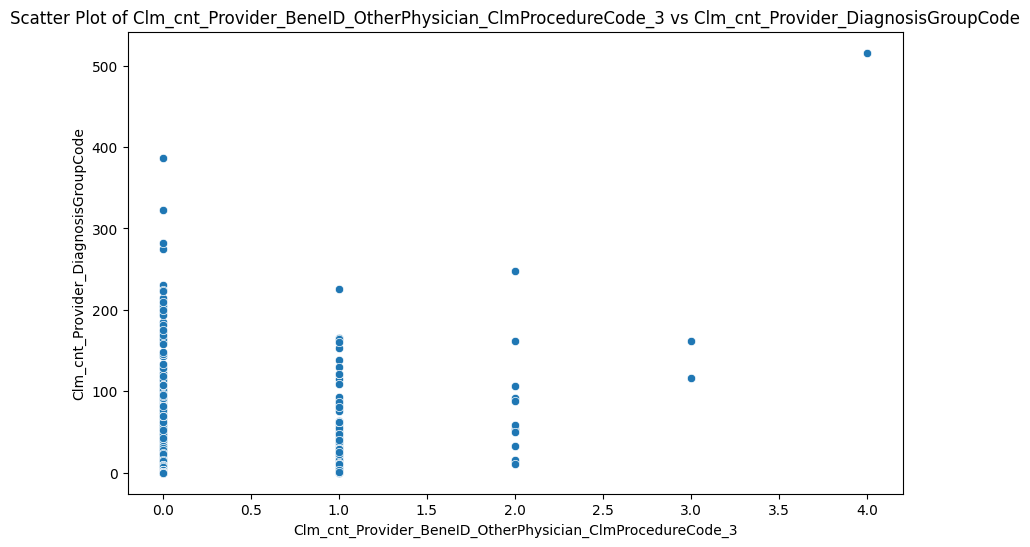

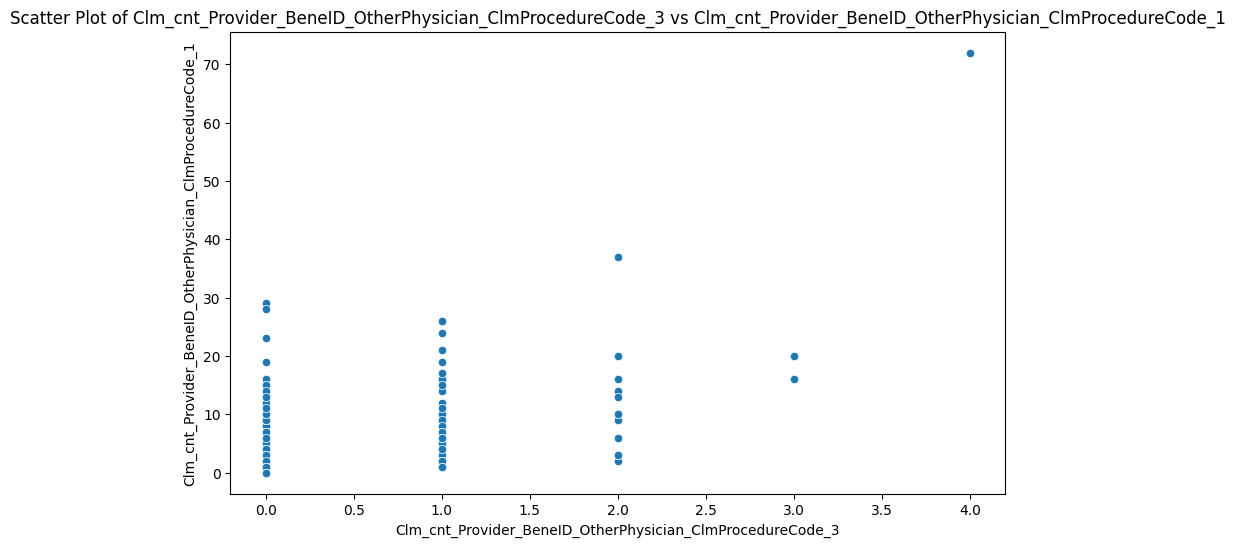

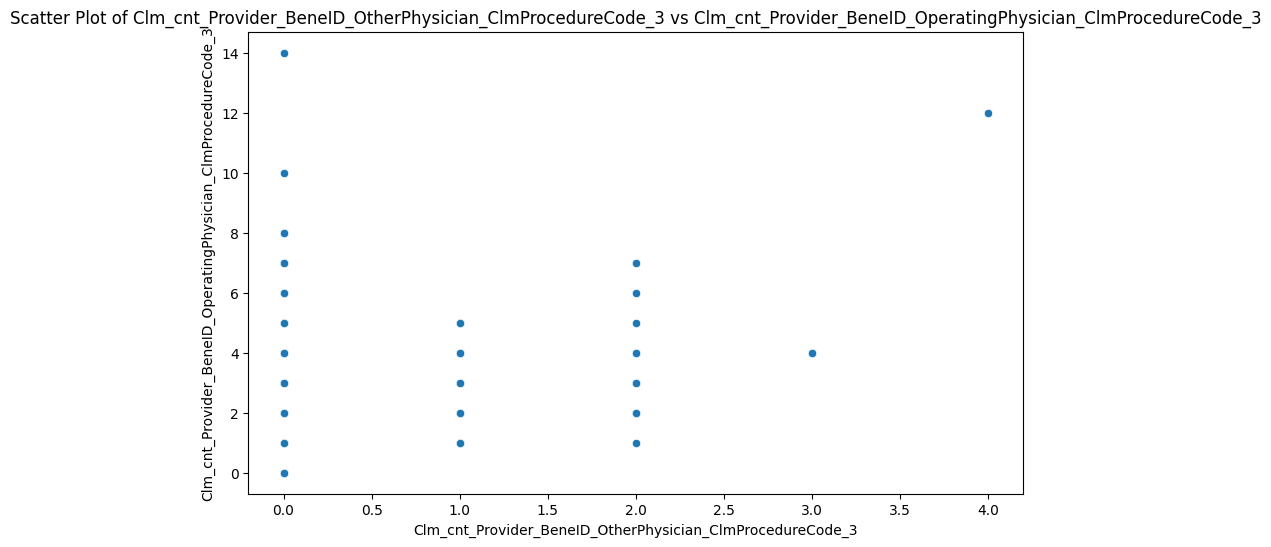

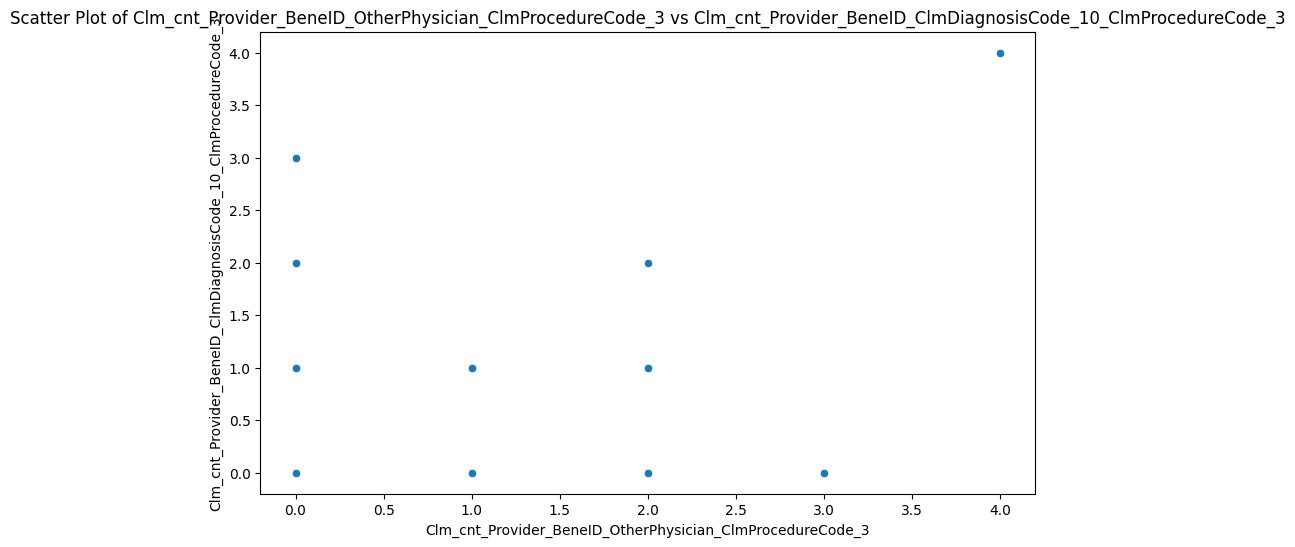

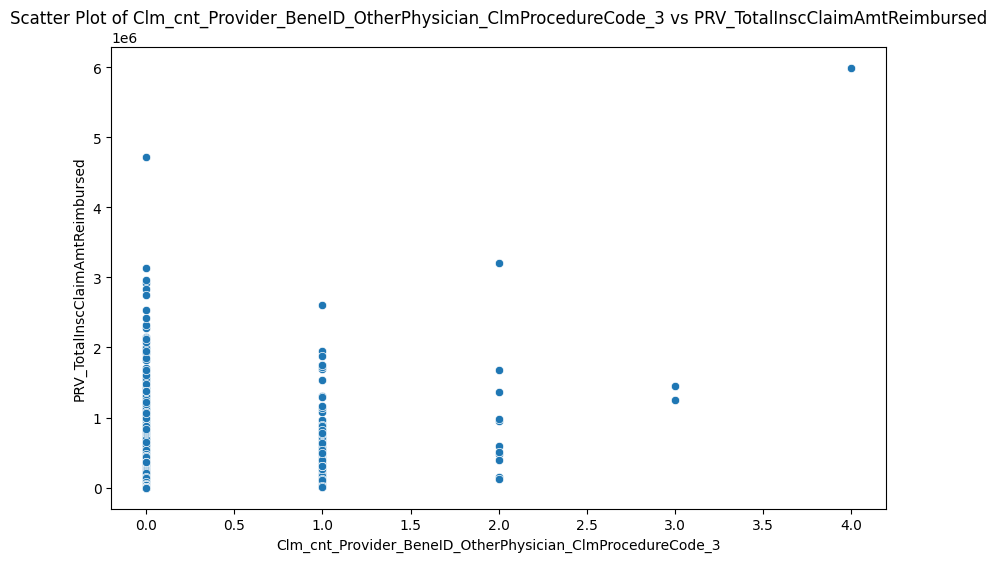

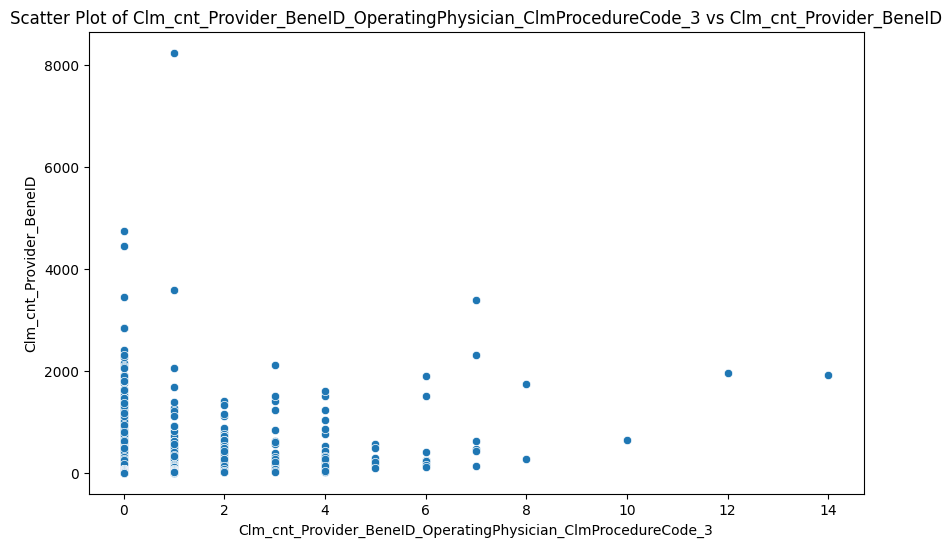

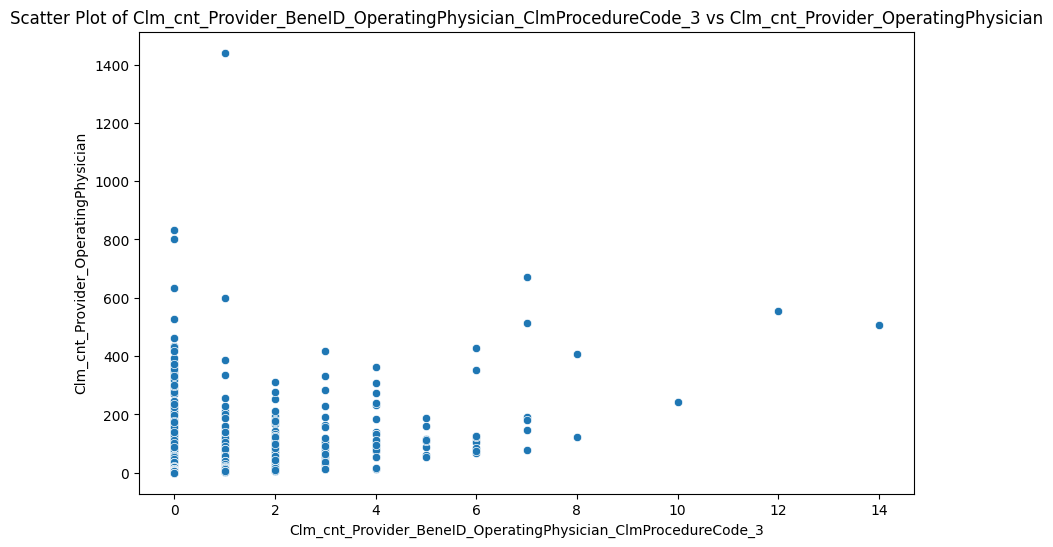

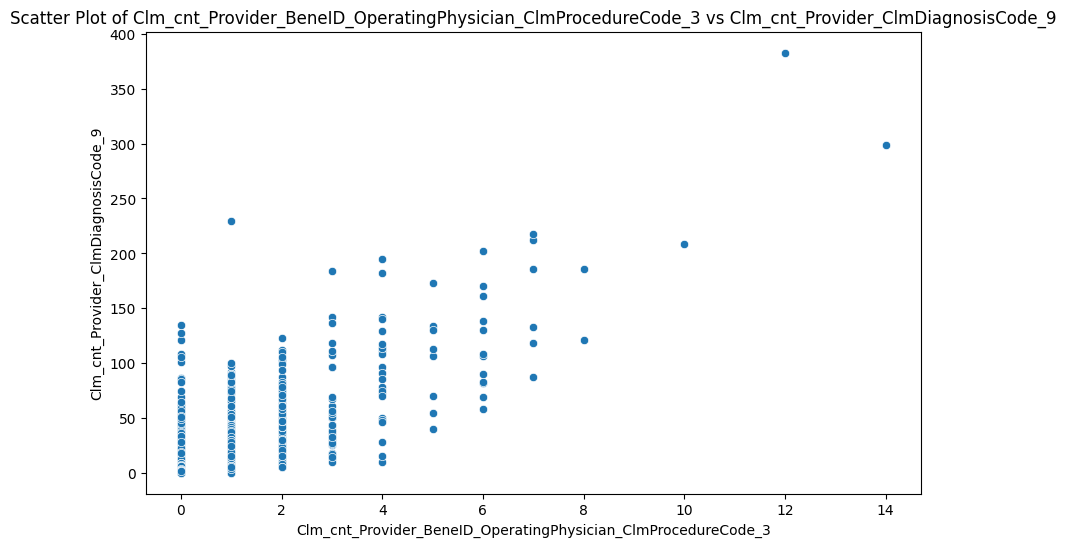

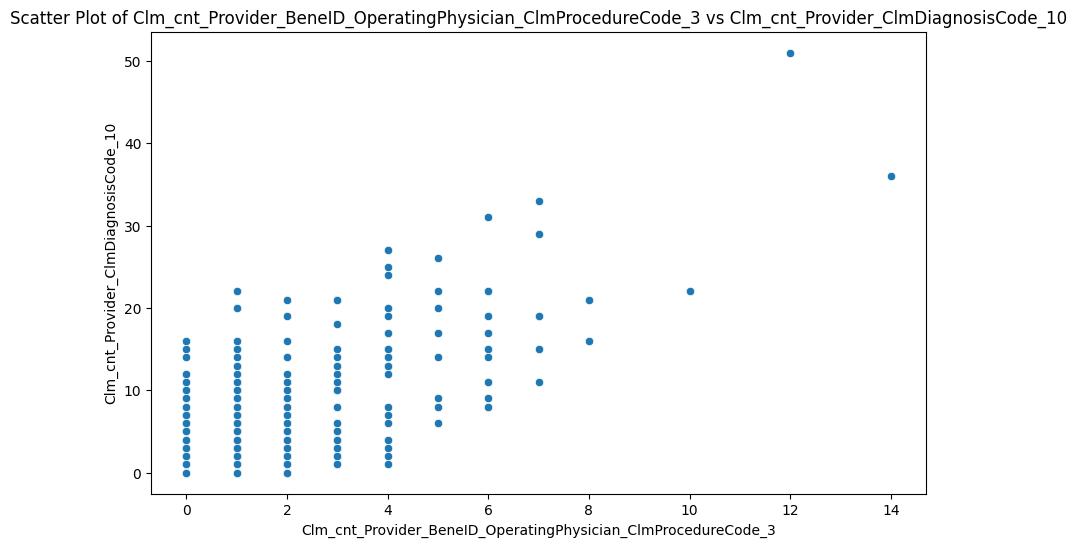

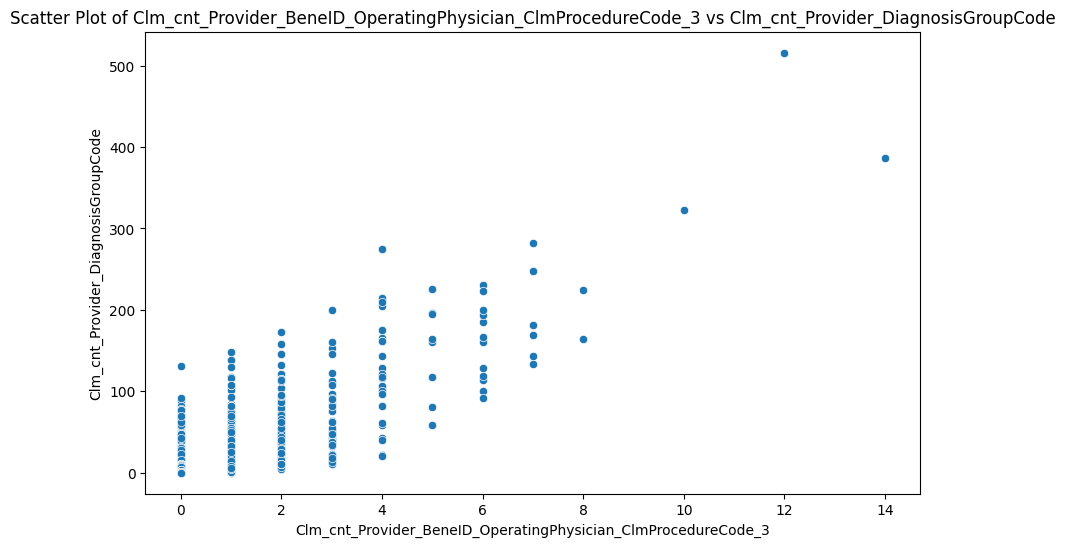

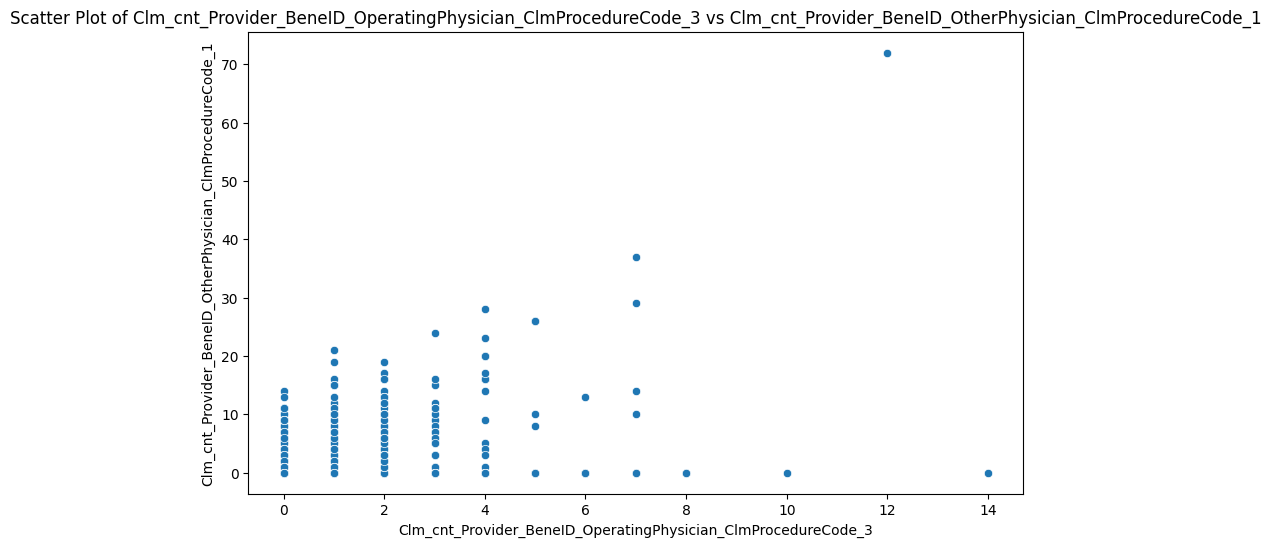

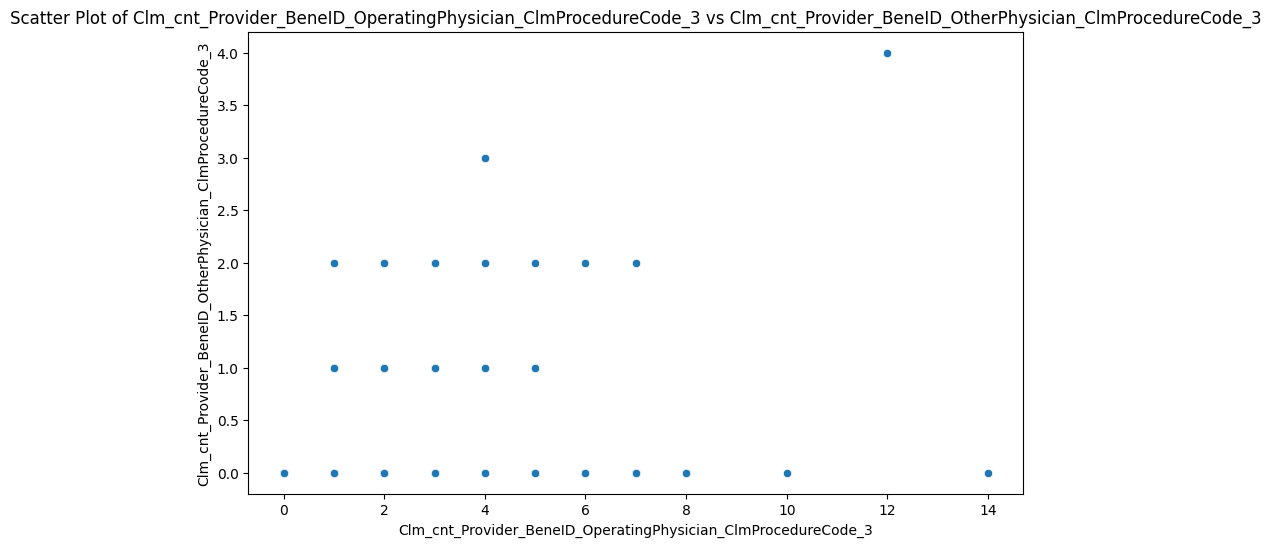

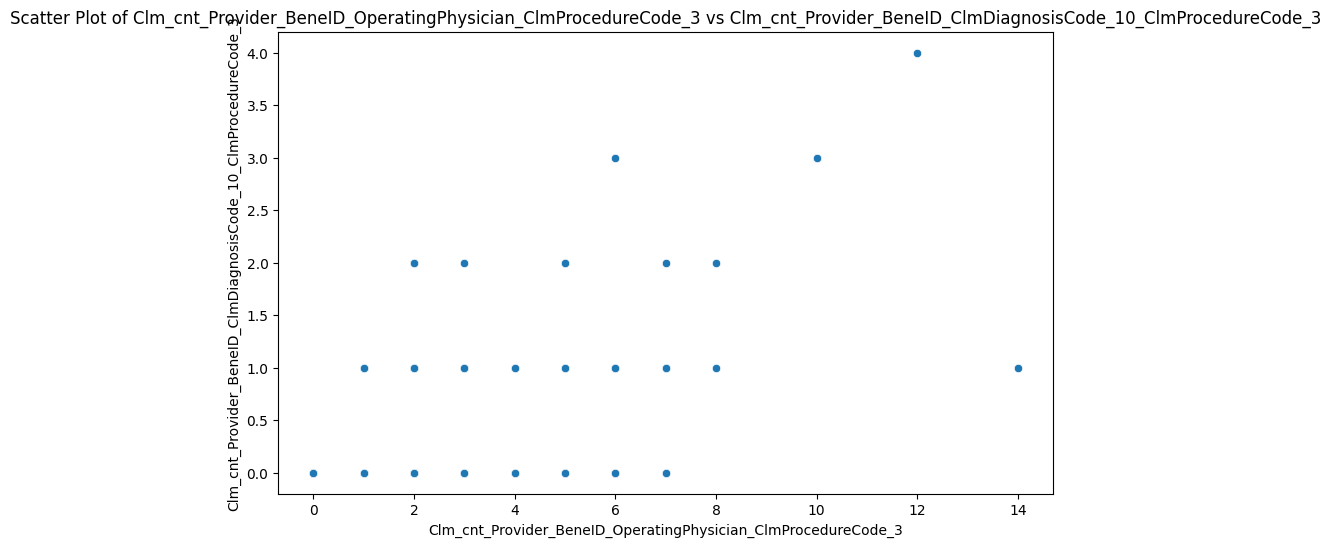

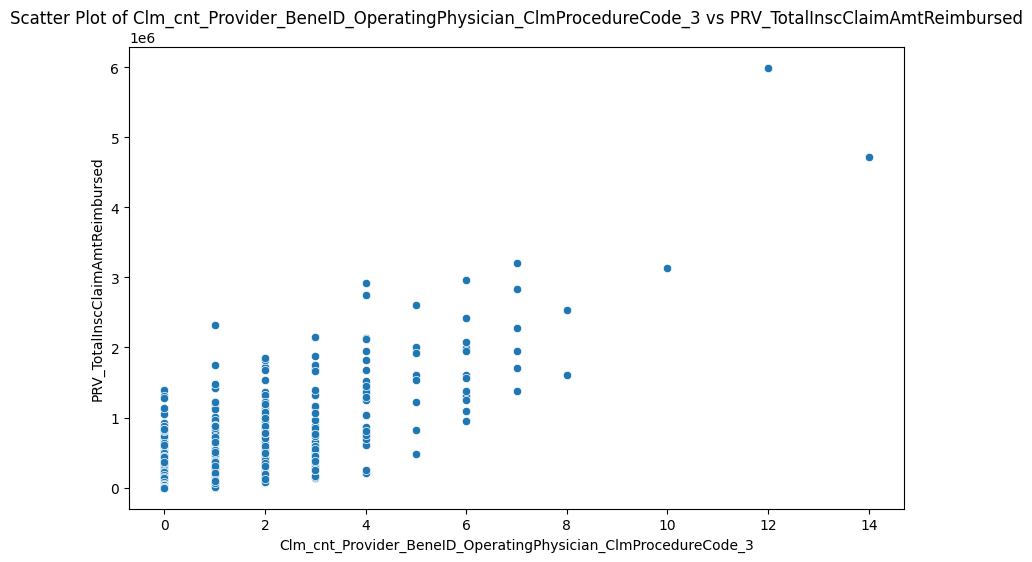

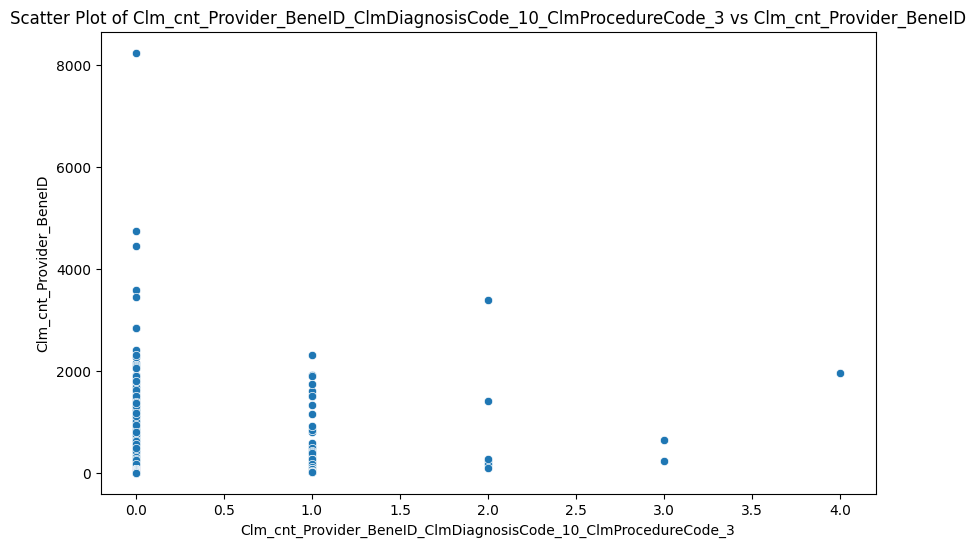

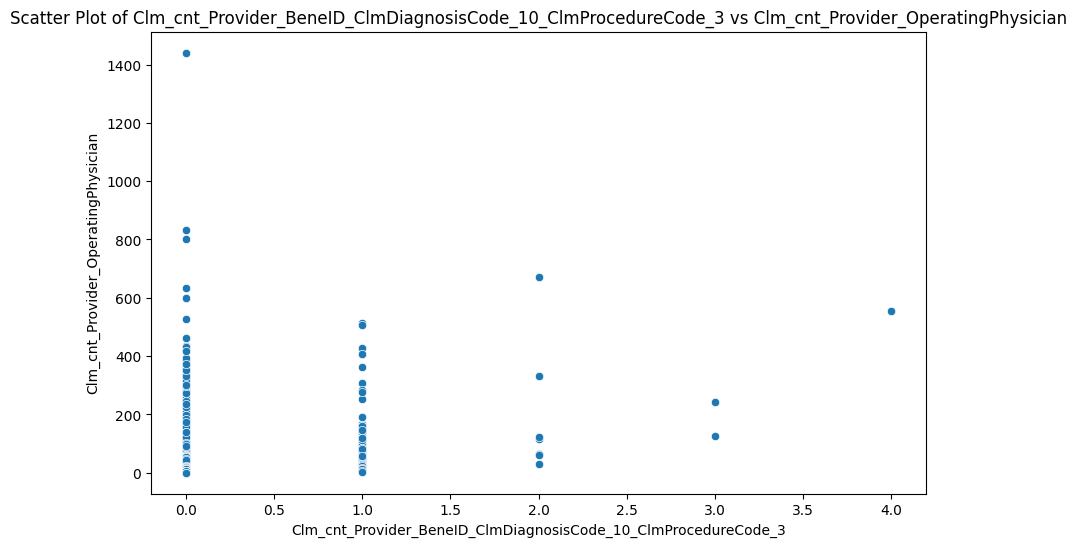

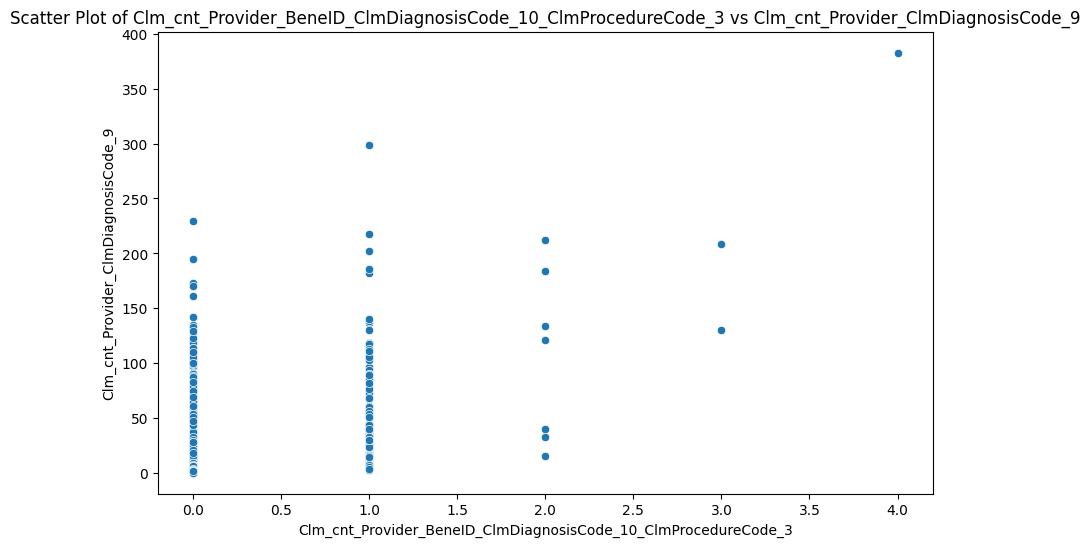

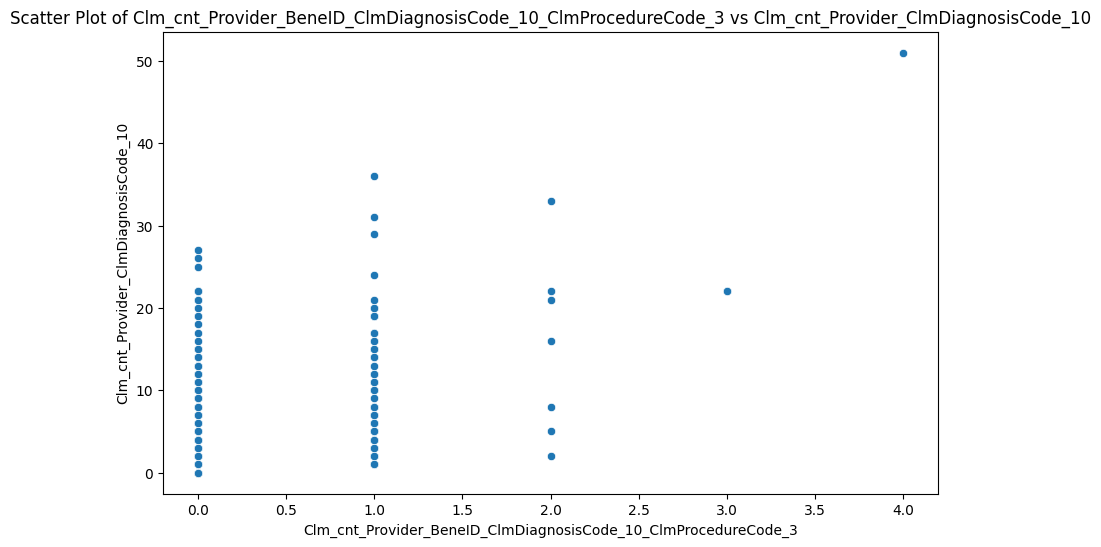

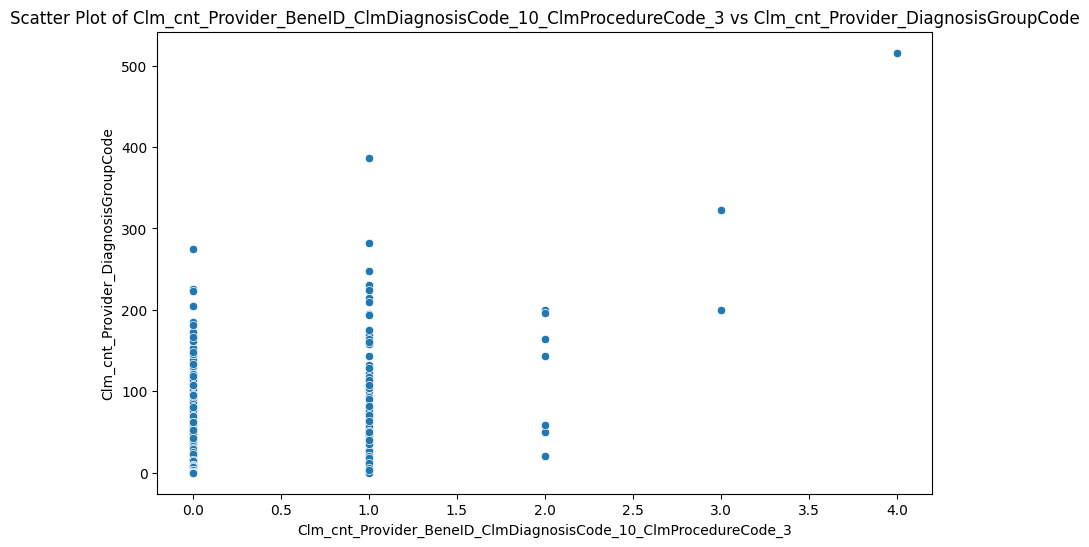

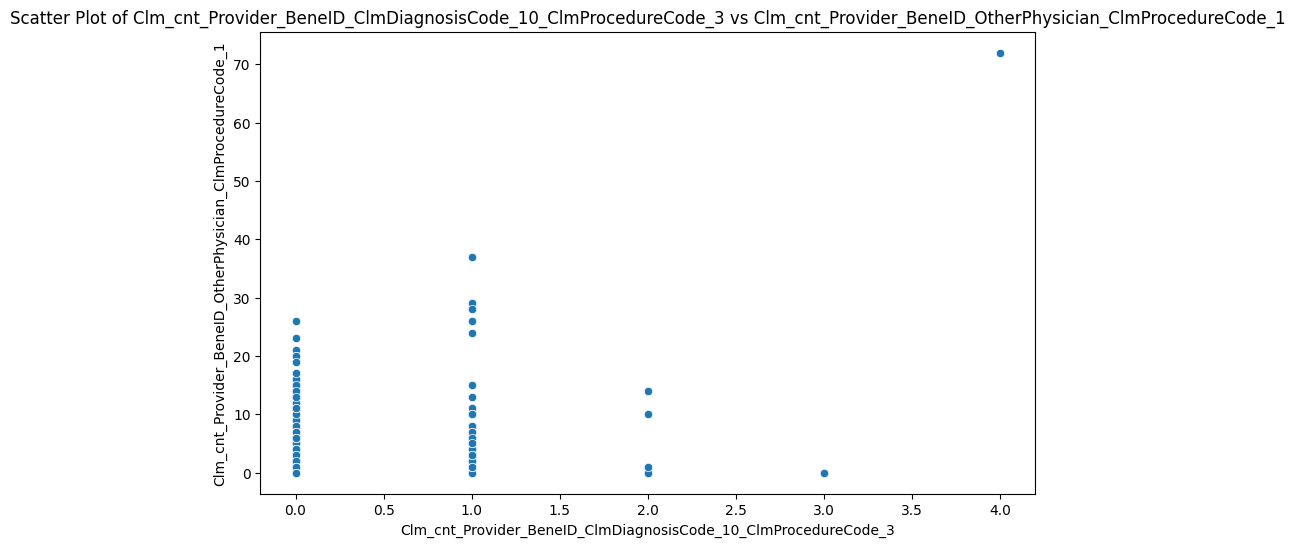

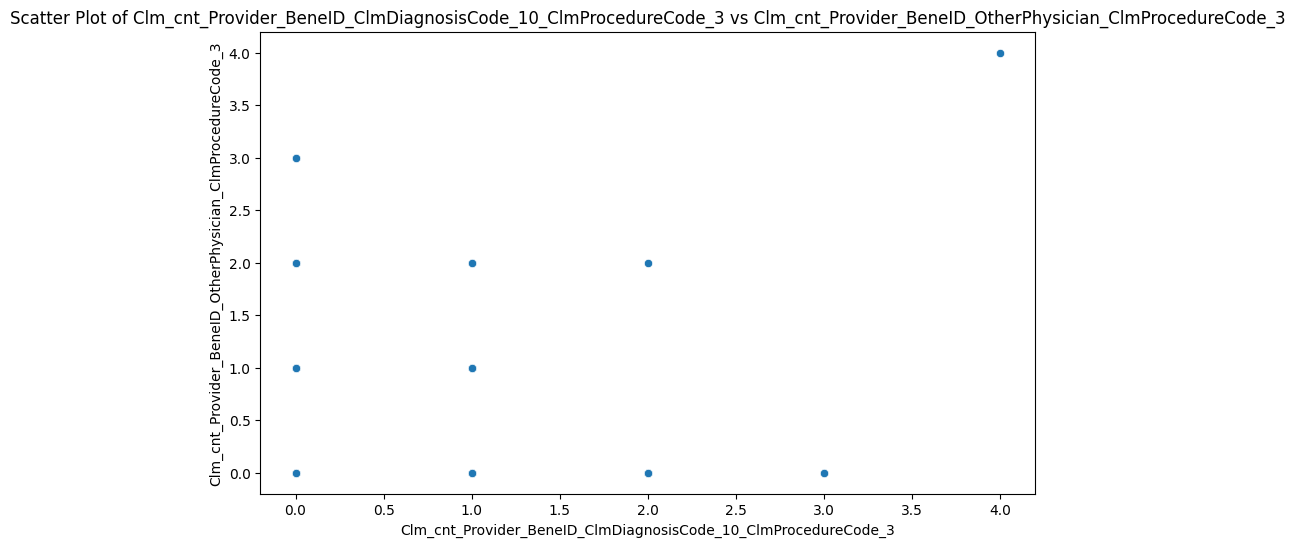

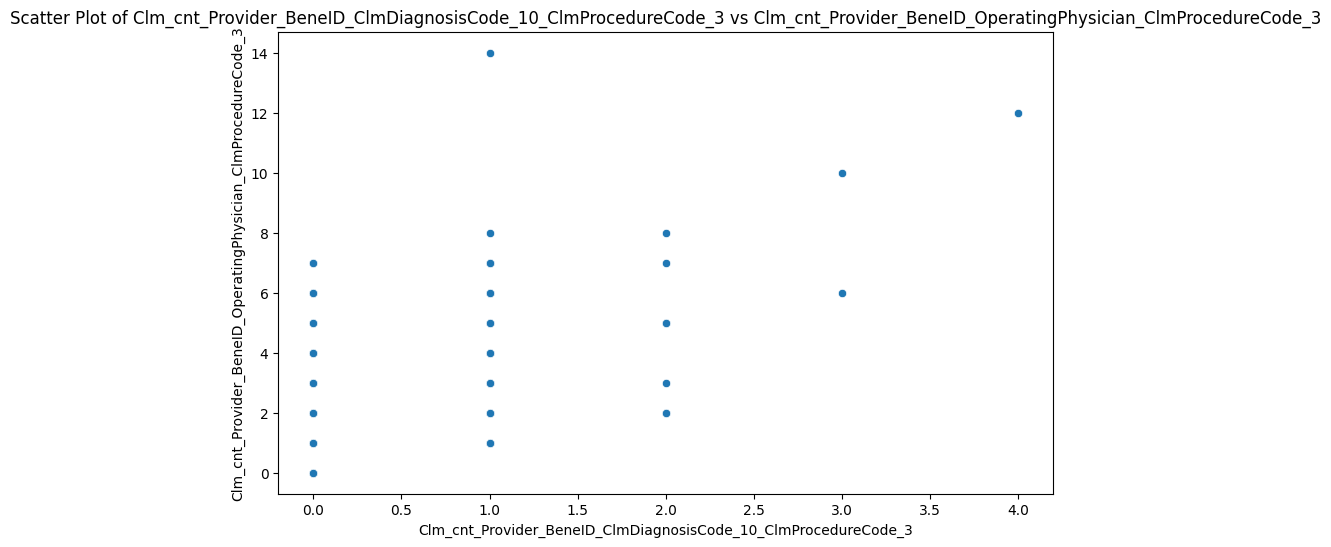

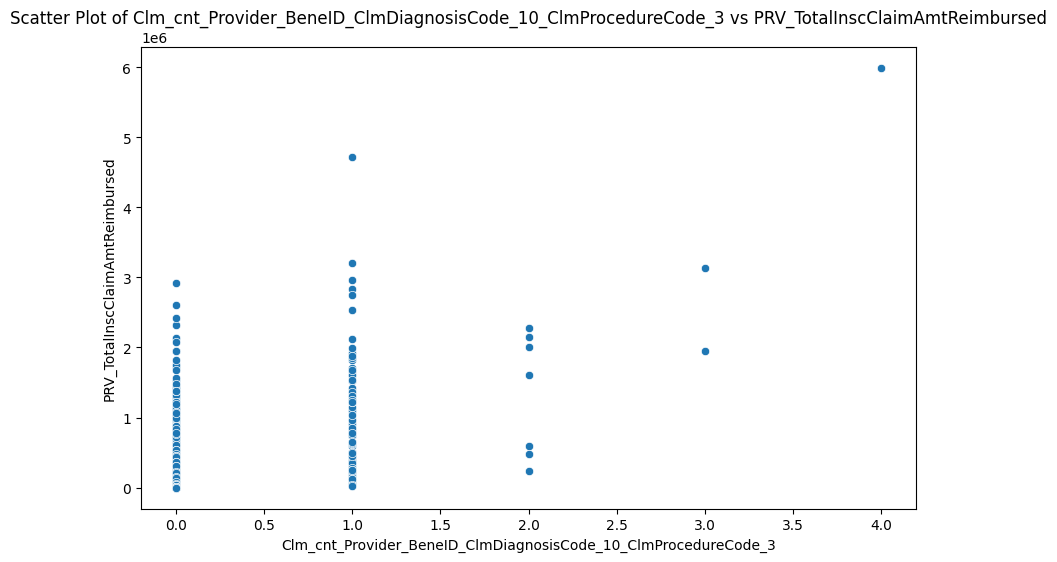

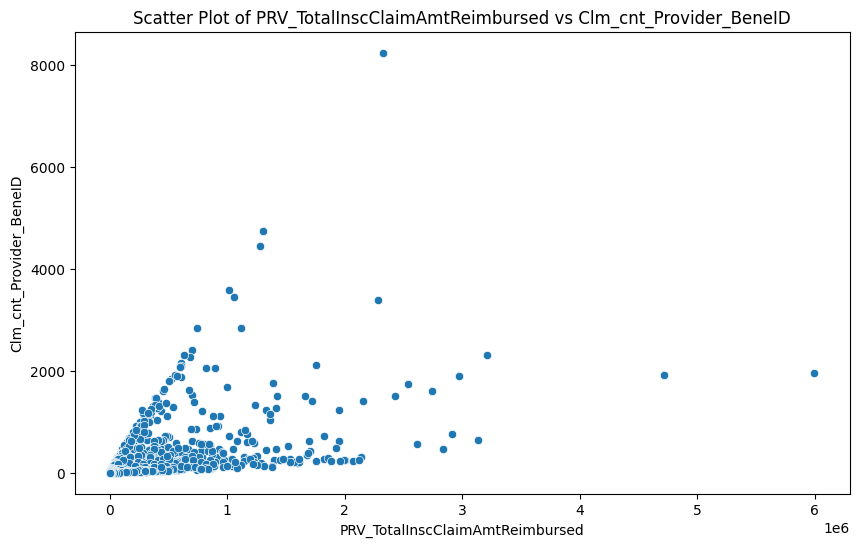

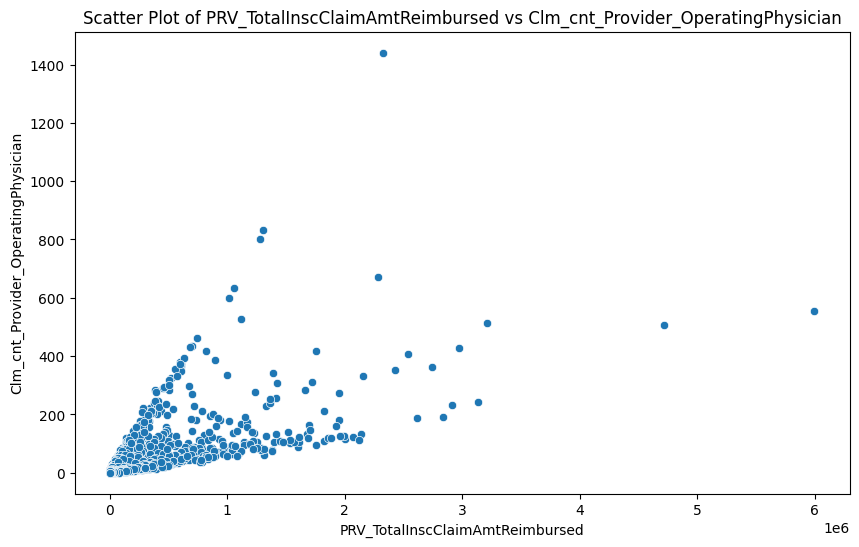

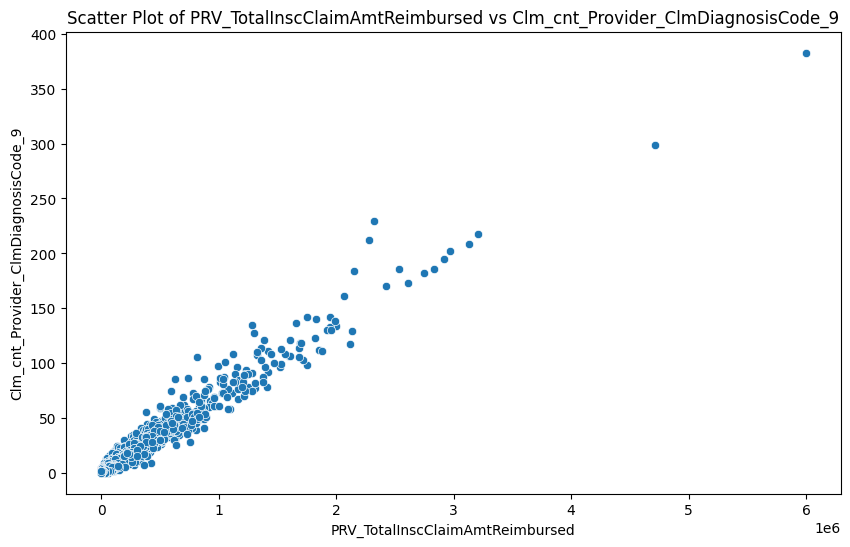

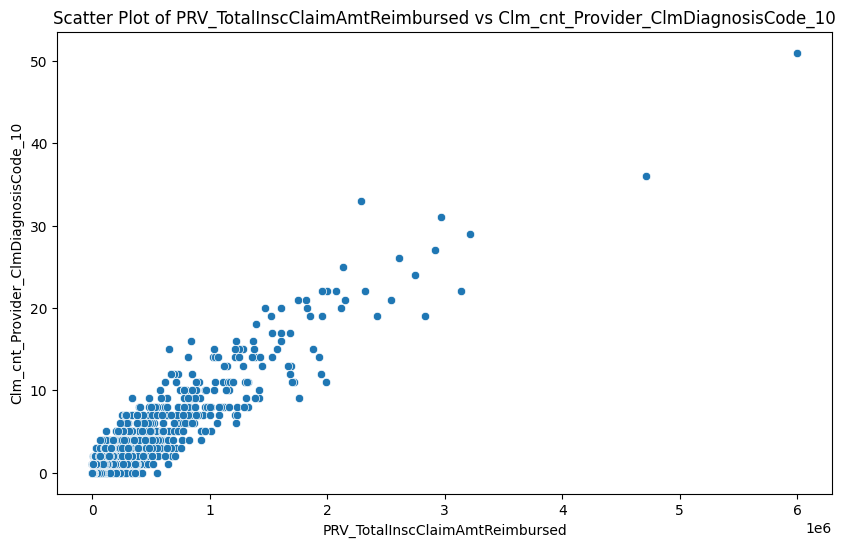

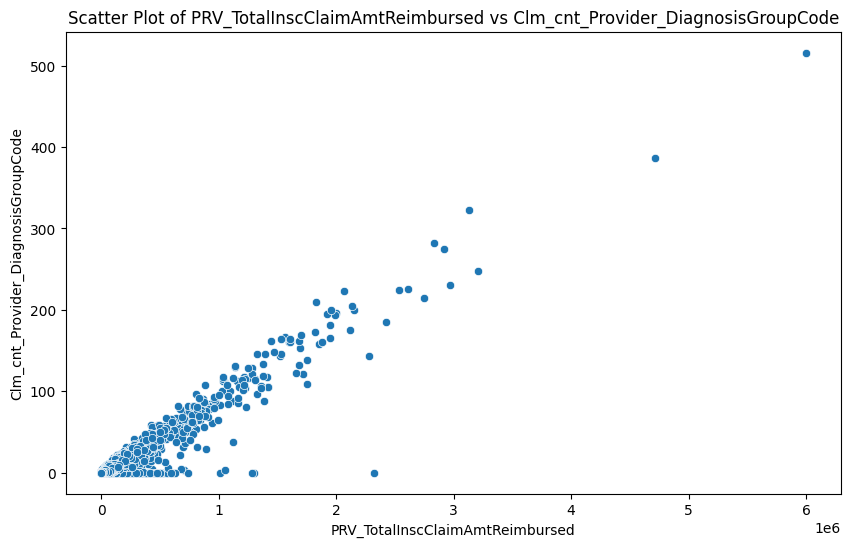

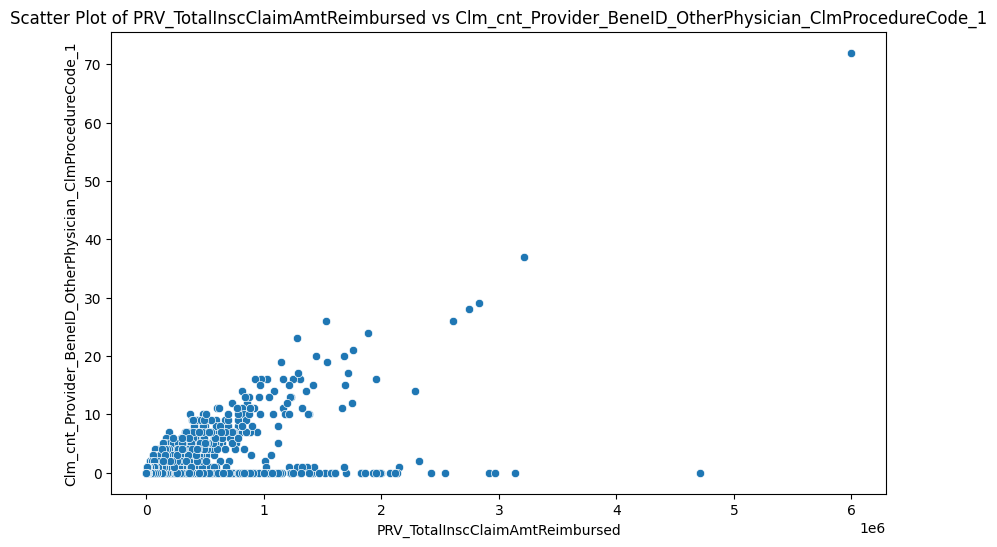

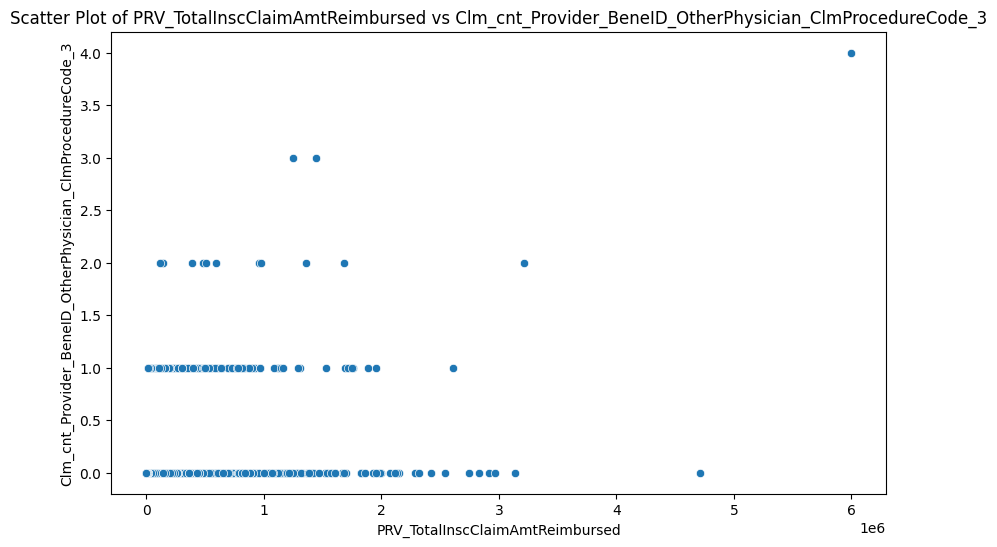

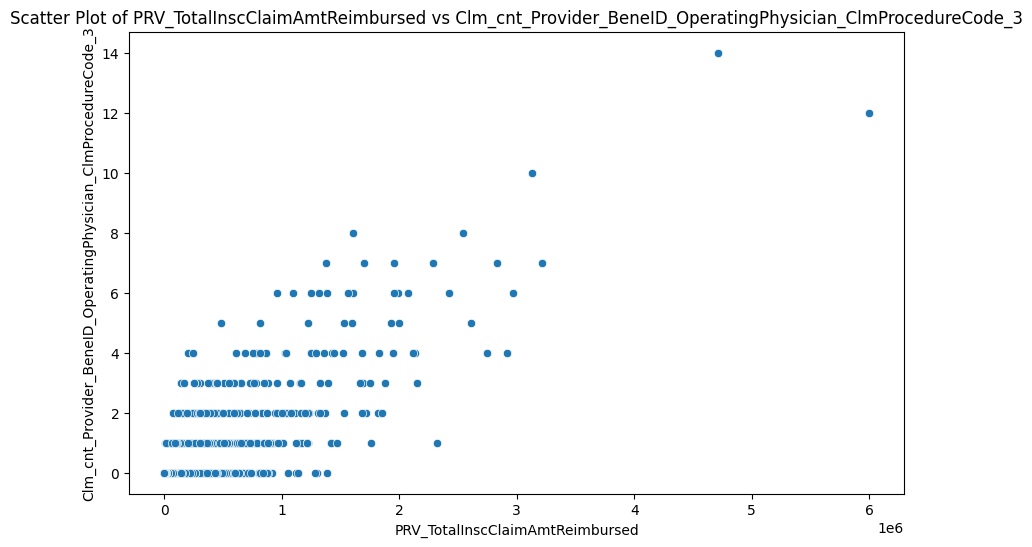

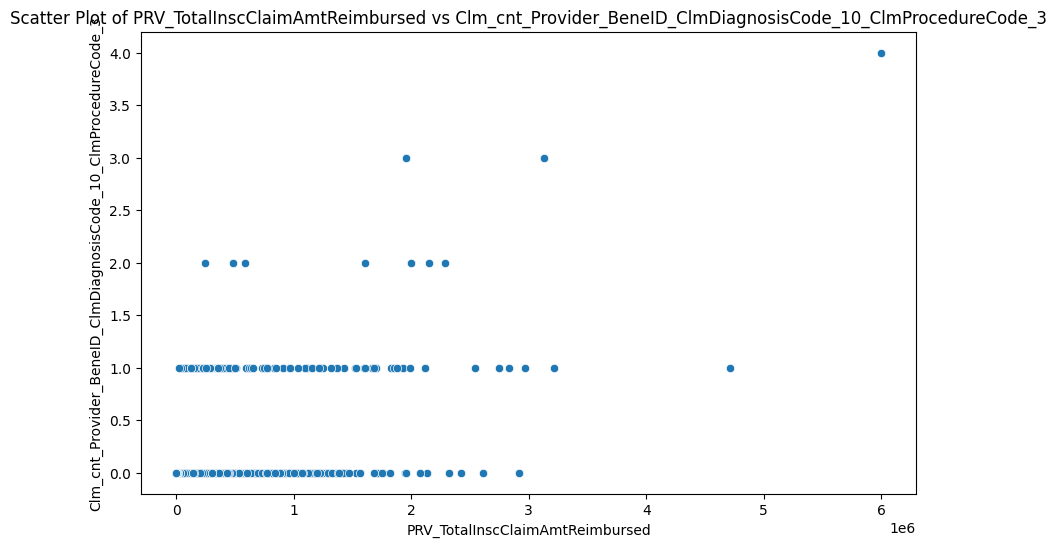

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the columns to be plotted, excluding 'Provider'
columns_to_plot = [col for col in df_set1_level_1.columns if col != 'Provider']

# Loop through each pair of columns
for i in columns_to_plot:
    for j in columns_to_plot:
        if i != j:  # Ensure we don't plot a variable against itself
            plt.figure(figsize=(10, 6))  # Set figure size for better visibility
            sns.scatterplot(data=df_set1_level_1, x=i, y=j)
            plt.title(f'Scatter Plot of {i} vs {j}')
            plt.xlabel(i)
            plt.ylabel(j)
            plt.show()

After evaluation the graphs, few fields can be removed as the outliers make less sense

In [44]:
columns=['Provider','Clm_cnt_Provider_BeneID',
'Clm_cnt_Provider_OperatingPhysician',
'Clm_cnt_Provider_ClmDiagnosisCode_9',
'Clm_cnt_Provider_ClmDiagnosisCode_10',
'Clm_cnt_Provider_DiagnosisGroupCode',
'Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_1',
'PRV_TotalInscClaimAmtReimbursed']

In [45]:
df_set1_level_1=df_set1_level_1[columns]

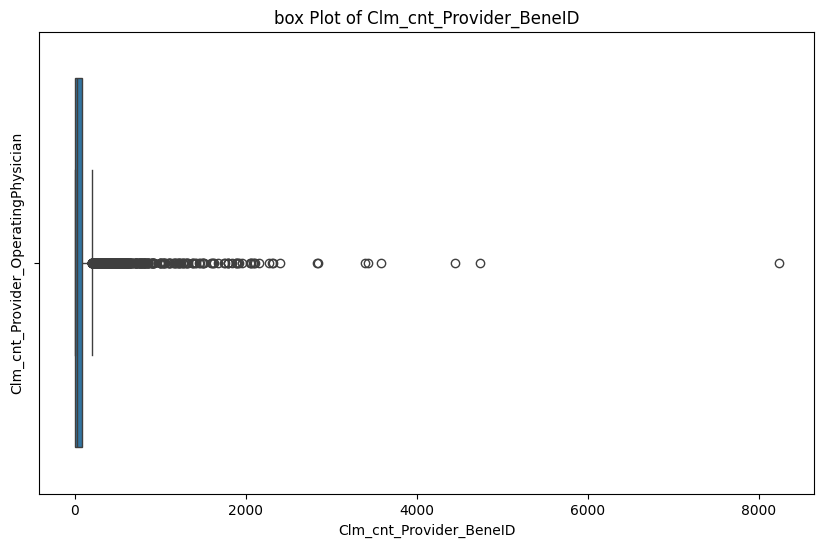

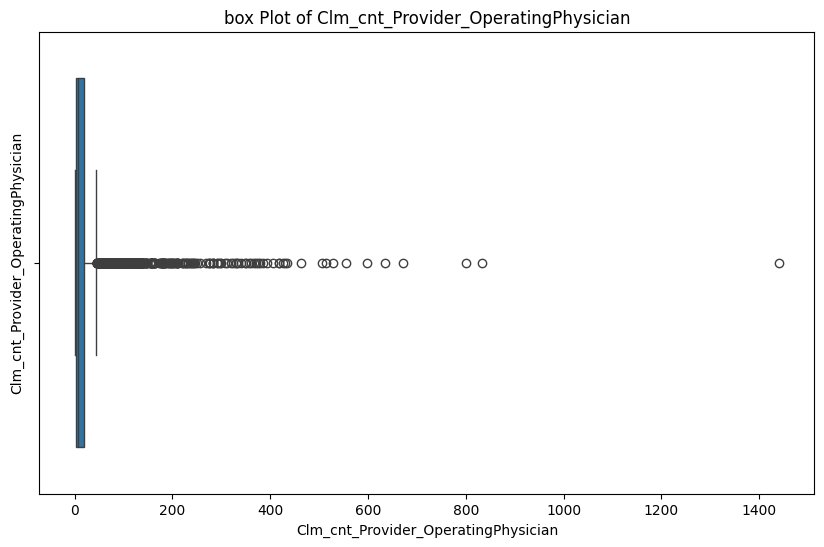

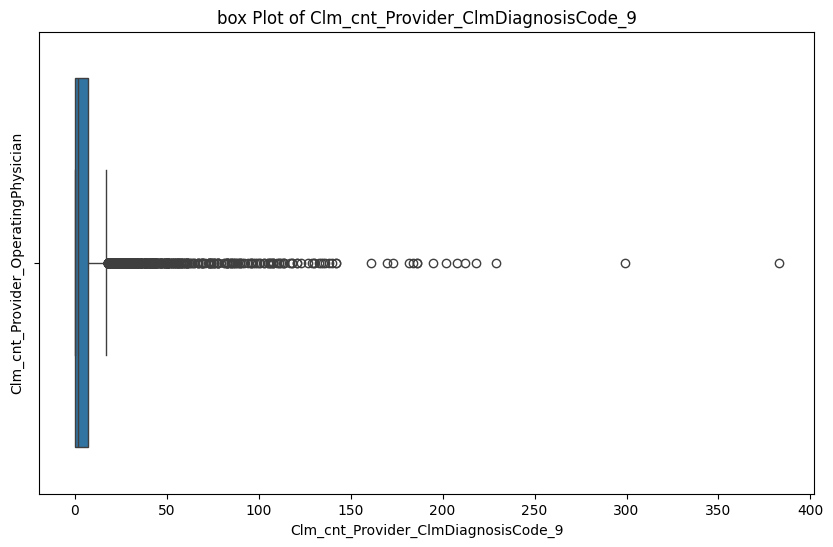

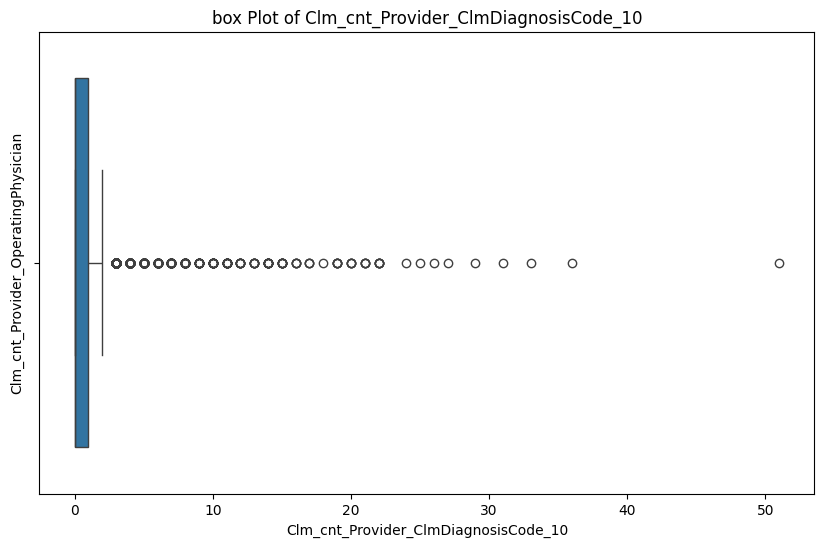

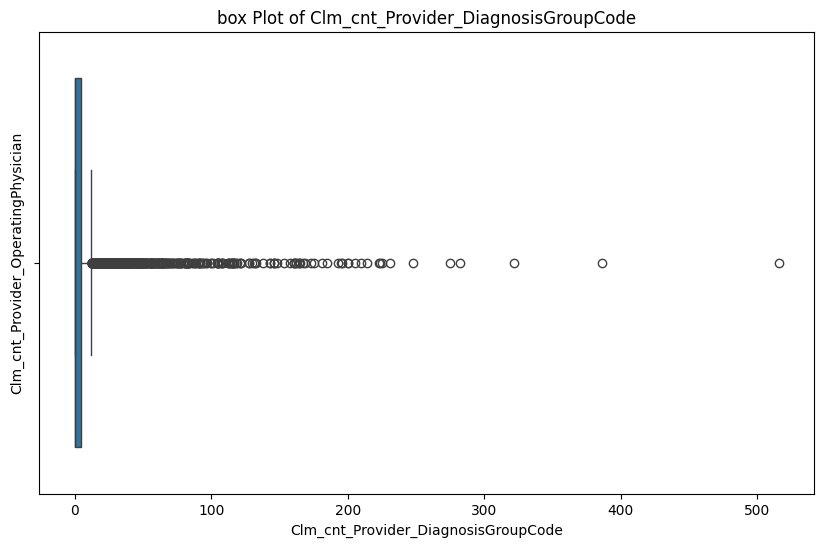

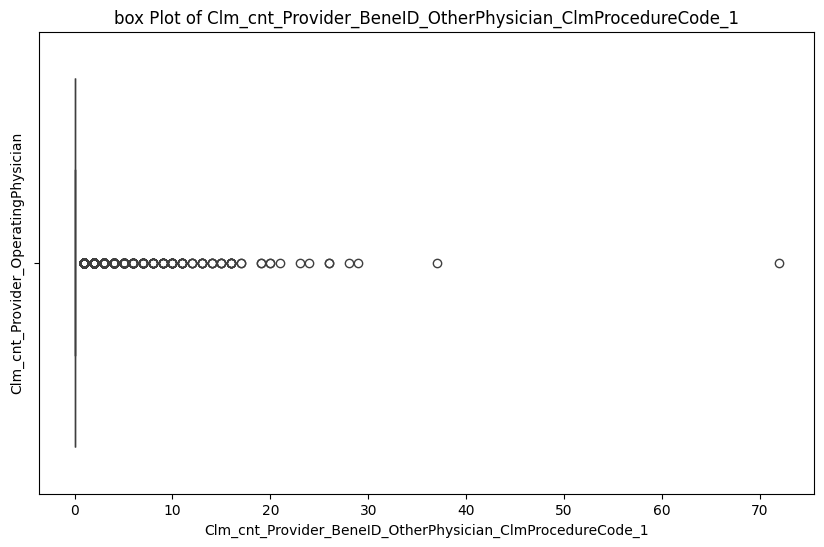

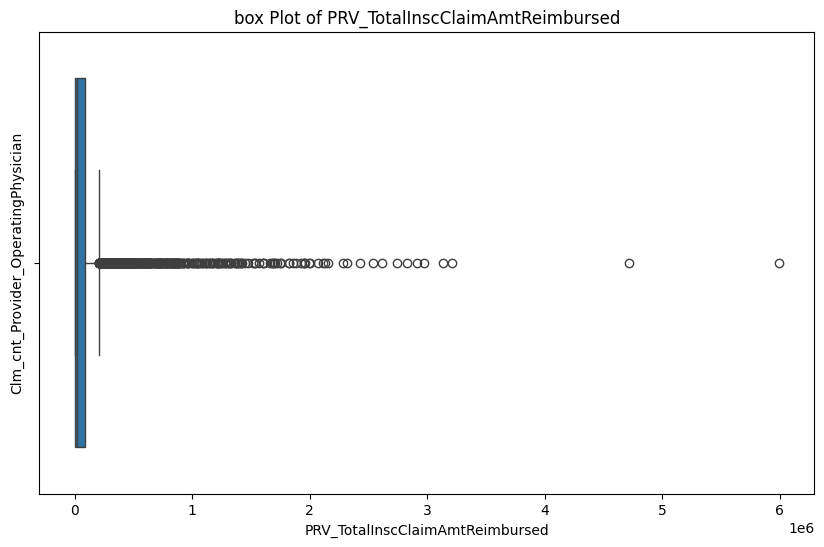

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the columns to be plotted, excluding 'Provider'
columns_to_plot = [col for col in df_set1_level_1.columns if col != 'Provider']

# Loop through each pair of columns
for i in columns_to_plot:
            plt.figure(figsize=(10, 6))  # Set figure size for better visibility
            sns.boxplot(data=df_set1_level_1, x=i)
            plt.title(f'box Plot of {i}')
            plt.xlabel(i)
            plt.ylabel(j)
            plt.show()